In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)


In [8]:
data=pd.read_csv("fraudTest.csv")

In [9]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [10]:
# Convert datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day
data['month'] = data['trans_date_trans_time'].dt.month

In [11]:
# Convert unix_time to transaction datetime
data['trans_time'] = pd.to_datetime(data['unix_time'], unit='s')


In [12]:
data = data.sort_values(['cc_num', 'trans_time'])
data['time_diff_sec'] = (
    data
    .groupby('cc_num')['trans_time']
    .diff()
    .dt.total_seconds()
)


In [13]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,trans_time,time_diff_sec
157,157,2020-06-21 13:05:42,60416207185,fraud_Kutch-Ferry,home,124.66,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,f21e1a09f59c50a66735409308285b1d,1371819942,42.945526,-108.530901,0,13,21,6,2013-06-21 13:05:42,NaN
741,741,2020-06-21 16:25:36,60416207185,fraud_Halvorson Group,misc_pos,78.52,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,08f67c9765438973006f8250351d8c1f,1371831936,42.193130,-108.682054,0,16,21,6,2013-06-21 16:25:36,11994.0
3047,3047,2020-06-22 07:58:33,60416207185,fraud_Conroy-Cruickshank,gas_transport,65.25,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,ca1f04d9d549c507356ffa8f9b43d81f,1371887913,43.932724,-109.699794,0,7,22,6,2013-06-22 07:58:33,55977.0
4351,4351,2020-06-22 15:32:31,60416207185,fraud_Larkin Ltd,kids_pets,87.74,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,d671d98fded8ca75d799959a444577a5,1371915151,43.546064,-109.212939,0,15,22,6,2013-06-22 15:32:31,27238.0
7695,7695,2020-06-23 12:28:54,60416207185,fraud_Leffler-Goldner,personal_care,148.02,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,86d346444b5b262159976aa4d8b64fbb,1371990534,42.876538,-109.333220,0,12,23,6,2013-06-23 12:28:54,75383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,552584,2020-12-31 02:10:10,4992346398065154184,fraud_Parisian and Sons,gas_transport,66.11,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1956-01-09,4620efdc6130bbbc9007b66e77021545,1388455810,40.915589,-88.806426,0,2,31,12,2013-12-31 02:10:10,8077.0
552892,552892,2020-12-31 05:13:35,4992346398065154184,fraud_Bogisich-Homenick,misc_net,4.58,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1956-01-09,e3d43c233659781065e17d4c5655cb88,1388466815,40.637488,-89.880600,0,5,31,12,2013-12-31 05:13:35,11005.0
553559,553559,2020-12-31 11:15:44,4992346398065154184,fraud_Erdman-Kertzmann,gas_transport,95.96,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1956-01-09,aab4f2a7e1eeb2bf3332db76bf955f66,1388488544,40.869708,-89.066993,0,11,31,12,2013-12-31 11:15:44,21729.0
553560,553560,2020-12-31 11:17:25,4992346398065154184,fraud_Stracke-Lemke,grocery_pos,149.48,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1956-01-09,90904857e6f31804e8c9c7716cdfd7ed,1388488645,41.437224,-90.132253,0,11,31,12,2013-12-31 11:17:25,101.0


In [14]:
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days / 365

In [15]:
# Drop original date columns
data = data.drop(columns=['trans_date_trans_time', 'dob'])


In [16]:
data = data.drop(columns=['Unnamed: 0', 'cc_num', 'trans_num', 'first', 'last', 'street'])


In [17]:
data

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,trans_time,time_diff_sec,age
157,fraud_Kutch-Ferry,home,124.66,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1371819942,42.945526,-108.530901,0,13,21,6,2013-06-21 13:05:42,NaN,34.364384
741,fraud_Halvorson Group,misc_pos,78.52,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1371831936,42.193130,-108.682054,0,16,21,6,2013-06-21 16:25:36,11994.0,34.364384
3047,fraud_Conroy-Cruickshank,gas_transport,65.25,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1371887913,43.932724,-109.699794,0,7,22,6,2013-06-22 07:58:33,55977.0,34.367123
4351,fraud_Larkin Ltd,kids_pets,87.74,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1371915151,43.546064,-109.212939,0,15,22,6,2013-06-22 15:32:31,27238.0,34.367123
7695,fraud_Leffler-Goldner,personal_care,148.02,F,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1371990534,42.876538,-109.333220,0,12,23,6,2013-06-23 12:28:54,75383.0,34.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,fraud_Parisian and Sons,gas_transport,66.11,M,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1388455810,40.915589,-88.806426,0,2,31,12,2013-12-31 02:10:10,8077.0,65.021918
552892,fraud_Bogisich-Homenick,misc_net,4.58,M,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1388466815,40.637488,-89.880600,0,5,31,12,2013-12-31 05:13:35,11005.0,65.021918
553559,fraud_Erdman-Kertzmann,gas_transport,95.96,M,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1388488544,40.869708,-89.066993,0,11,31,12,2013-12-31 11:15:44,21729.0,65.021918
553560,fraud_Stracke-Lemke,grocery_pos,149.48,M,Mc Nabb,IL,61335,41.1730,-89.2187,532,Audiological scientist,1388488645,41.437224,-90.132253,0,11,31,12,2013-12-31 11:17:25,101.0,65.021918


In [18]:
data.isnull().sum()

merchant           0
category           0
amt                0
gender             0
city               0
state              0
zip                0
lat                0
long               0
city_pop           0
job                0
unix_time          0
merch_lat          0
merch_long         0
is_fraud           0
hour               0
day                0
month              0
trans_time         0
time_diff_sec    924
age                0
dtype: int64

In [19]:
data['time_diff_sec'].fillna(data['time_diff_sec'].median(), inplace=True)


C:\Users\manoj\AppData\Local\Temp\ipykernel_13320\2018698424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['time_diff_sec'].fillna(data['time_diff_sec'].median(), inplace=True)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   merchant       555719 non-null  object        
 1   category       555719 non-null  object        
 2   amt            555719 non-null  float64       
 3   gender         555719 non-null  object        
 4   city           555719 non-null  object        
 5   state          555719 non-null  object        
 6   zip            555719 non-null  int64         
 7   lat            555719 non-null  float64       
 8   long           555719 non-null  float64       
 9   city_pop       555719 non-null  int64         
 10  job            555719 non-null  object        
 11  unix_time      555719 non-null  int64         
 12  merch_lat      555719 non-null  float64       
 13  merch_long     555719 non-null  float64       
 14  is_fraud       555719 non-null  int64         
 15  hou

In [21]:
data.drop(columns=['merchant','city','zip','job','unix_time','trans_time'],inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       555719 non-null  object 
 1   amt            555719 non-null  float64
 2   gender         555719 non-null  object 
 3   state          555719 non-null  object 
 4   lat            555719 non-null  float64
 5   long           555719 non-null  float64
 6   city_pop       555719 non-null  int64  
 7   merch_lat      555719 non-null  float64
 8   merch_long     555719 non-null  float64
 9   is_fraud       555719 non-null  int64  
 10  hour           555719 non-null  int32  
 11  day            555719 non-null  int32  
 12  month          555719 non-null  int32  
 13  time_diff_sec  555719 non-null  float64
 14  age            555719 non-null  float64
dtypes: float64(7), int32(3), int64(2), object(3)
memory usage: 61.5+ MB


In [23]:
categorical_features = ['category', 'gender', 'state']
numeric_features = [
    'amt', 'lat', 'long', 'city_pop', 
    'merch_lat', 'merch_long', 'hour', 'day', 'month', 
    'time_diff_sec', 'age'
]


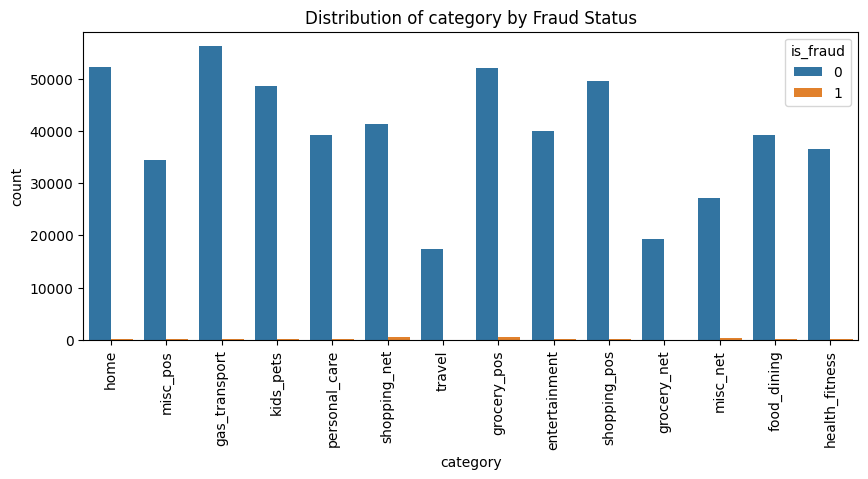

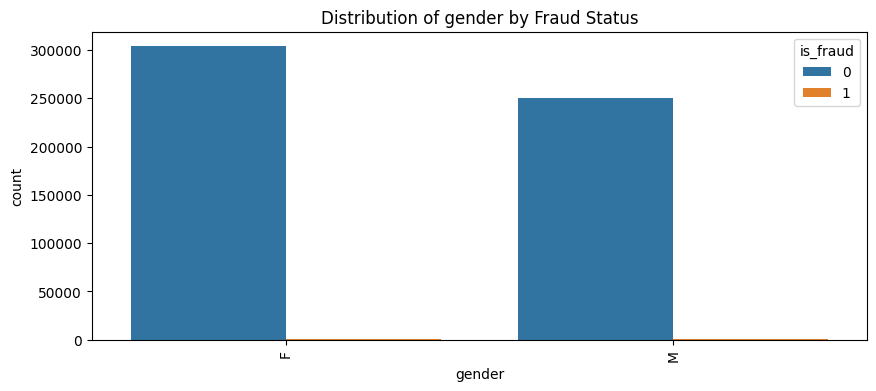

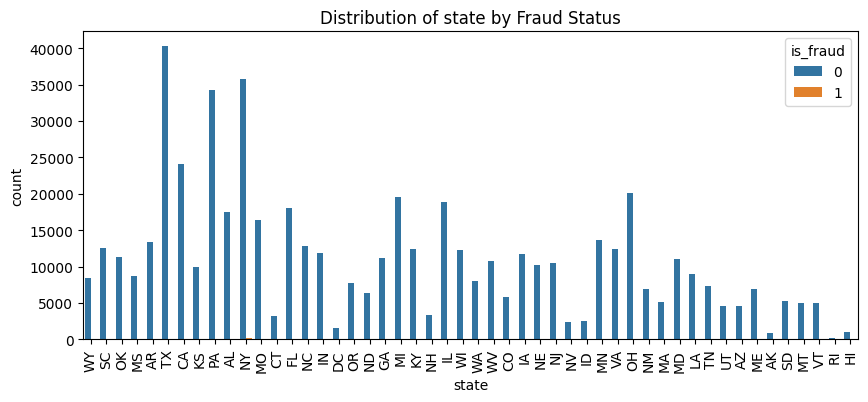

In [24]:
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, hue='is_fraud')
    plt.title(f'Distribution of {col} by Fraud Status')
    plt.xticks(rotation=90)

C:\Users\manoj\AppData\Local\Temp\ipykernel_13320\3399883992.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


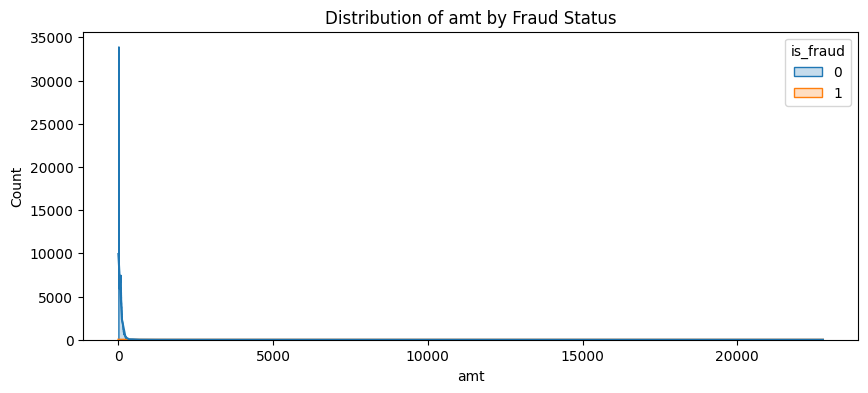

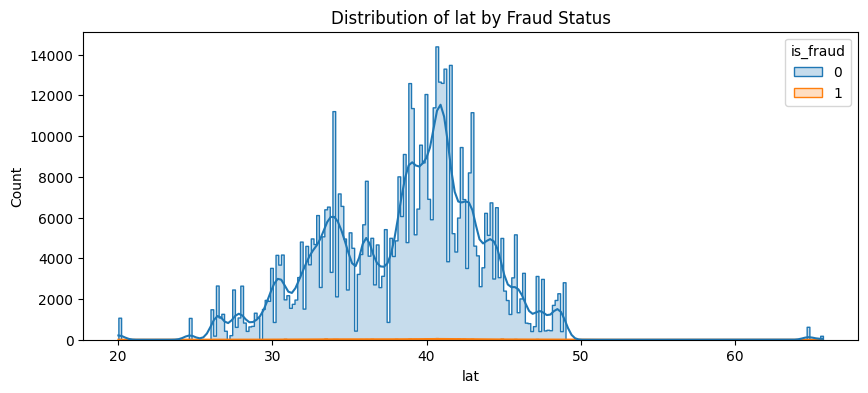

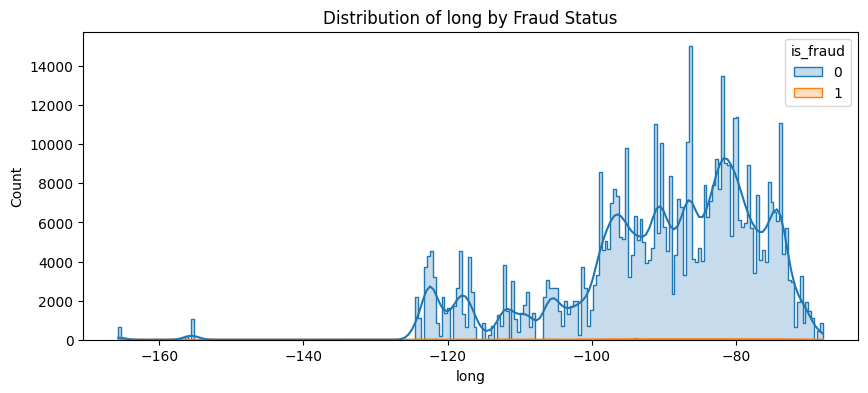

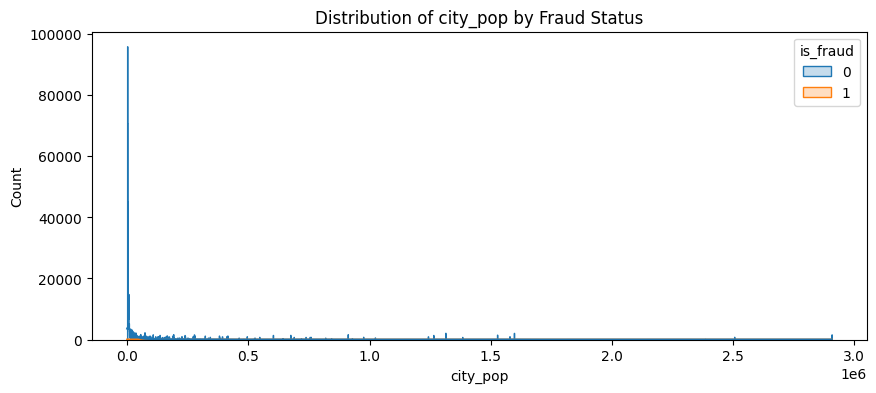

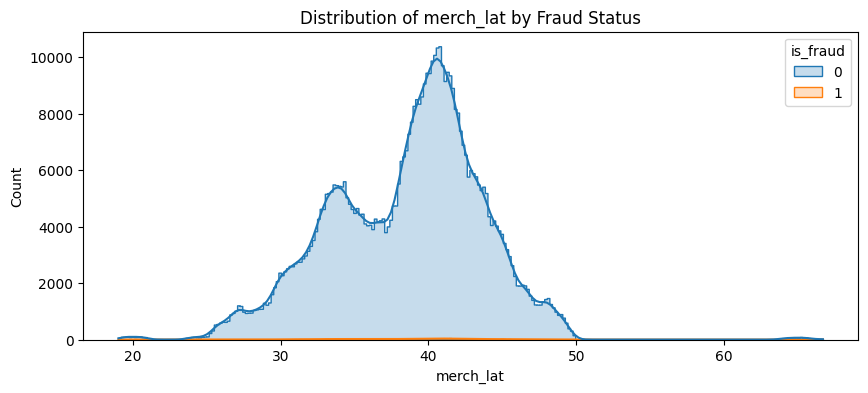

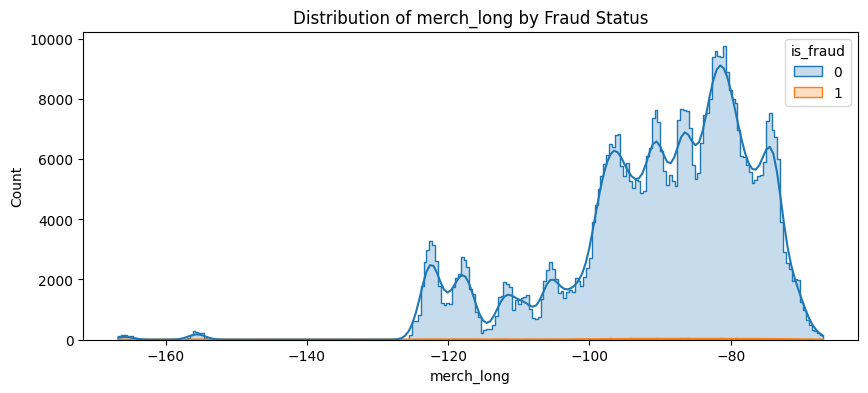

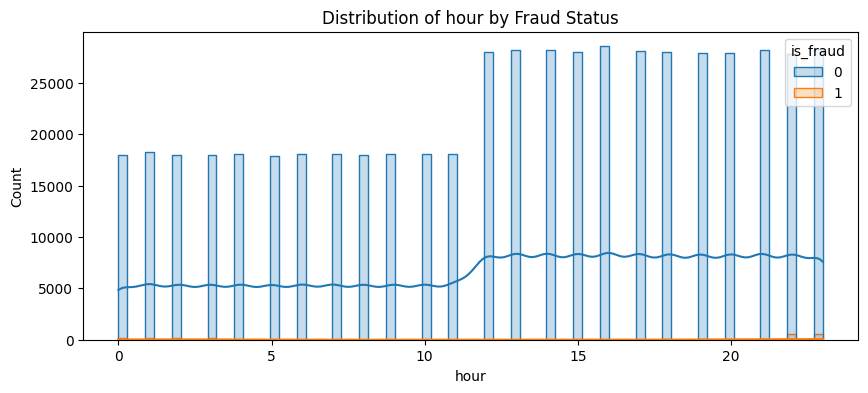

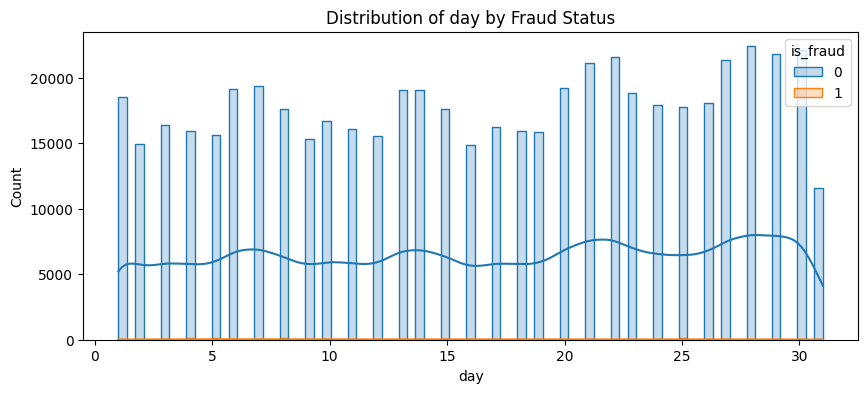

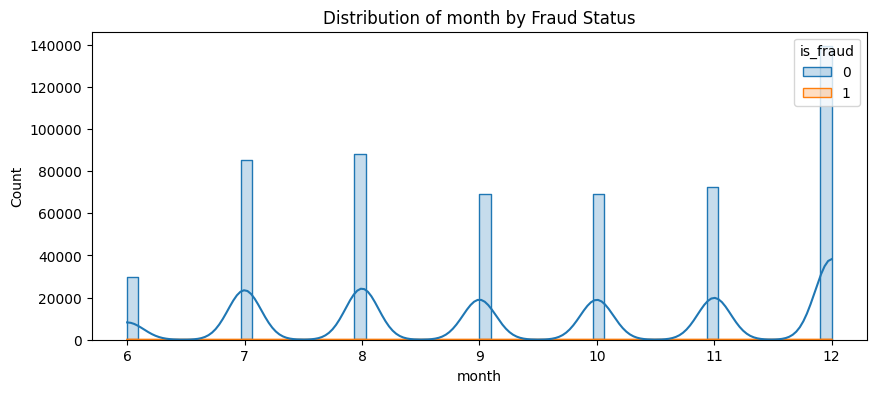

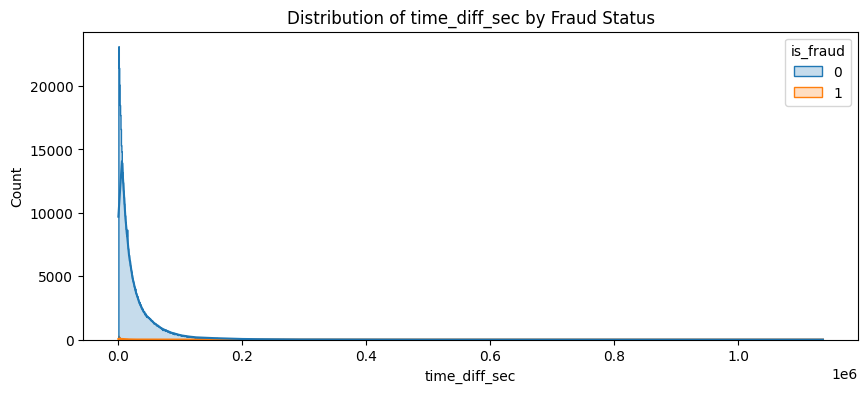

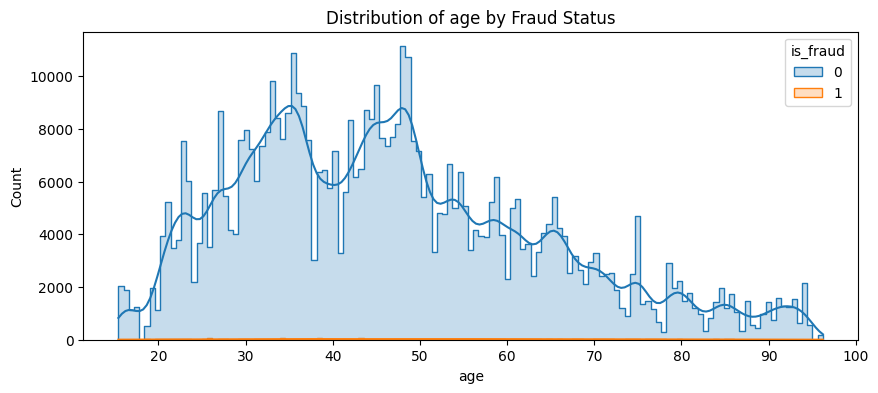

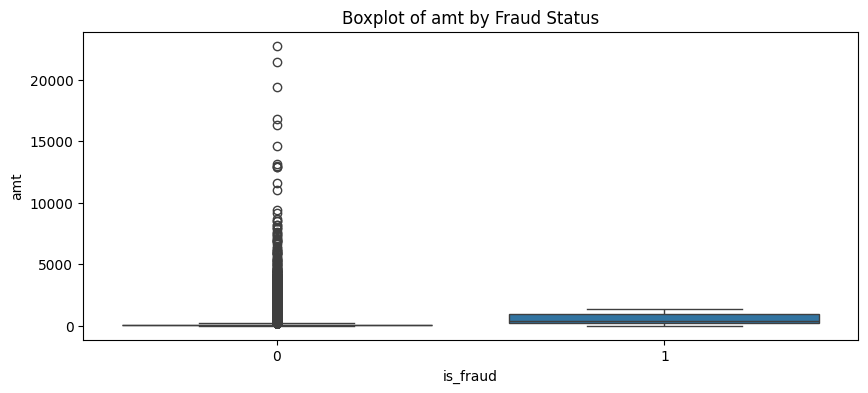

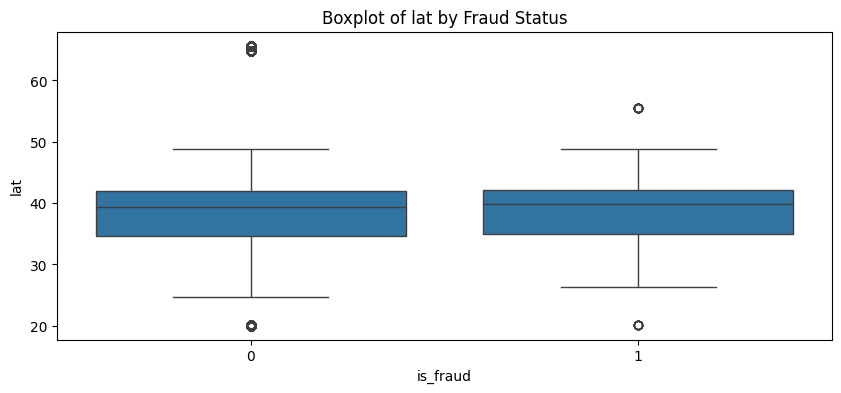

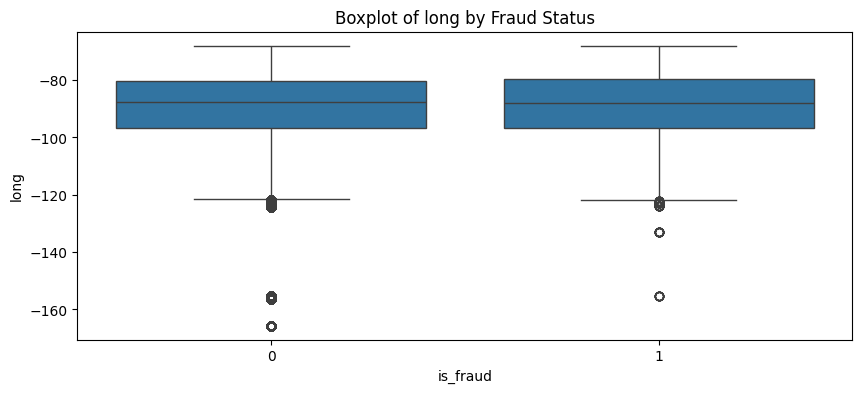

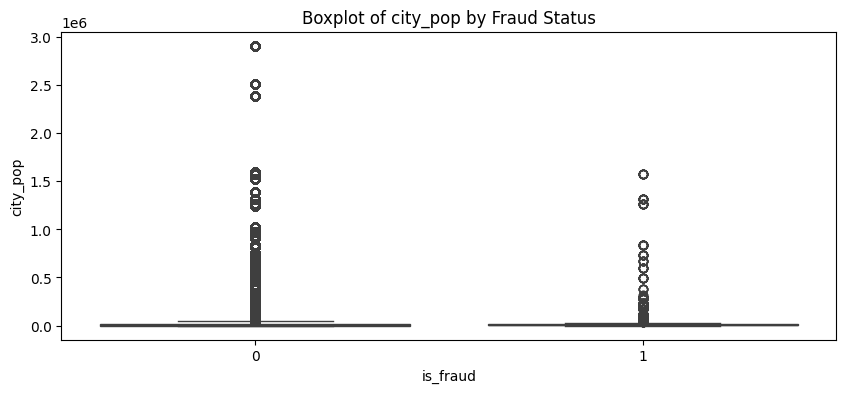

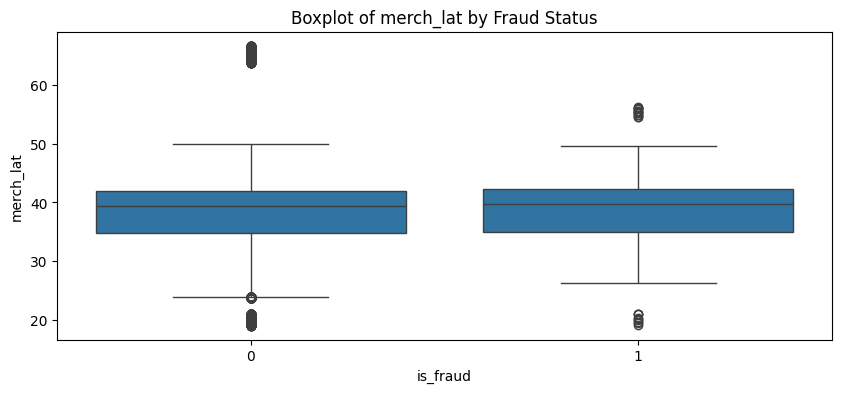

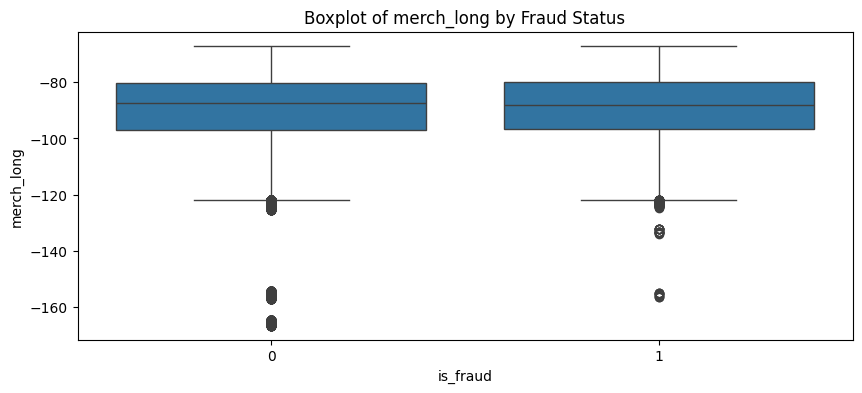

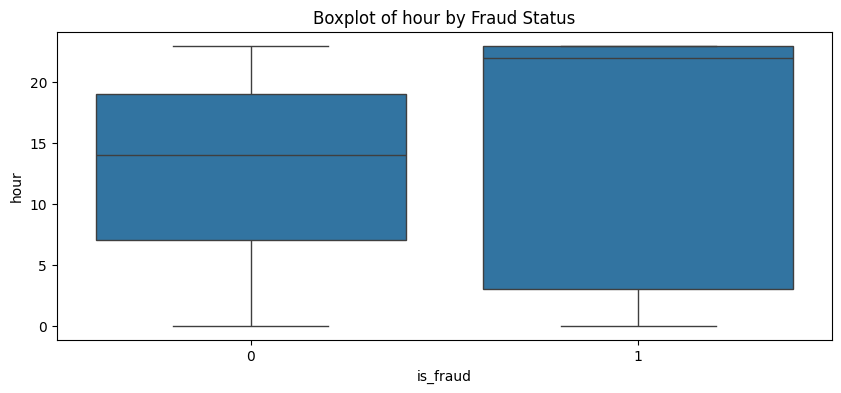

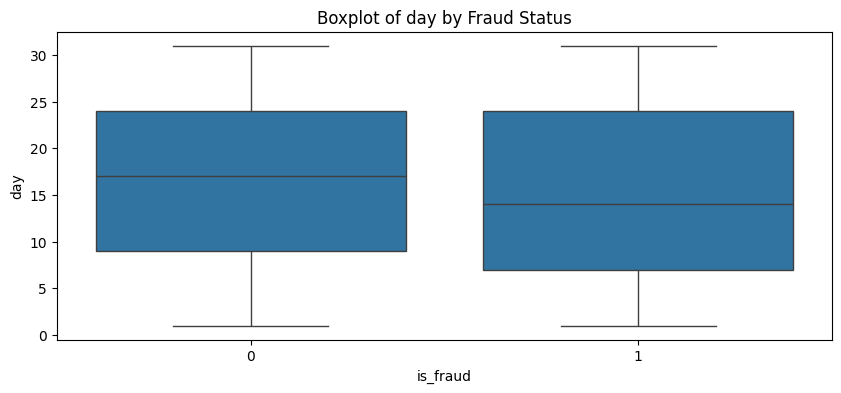

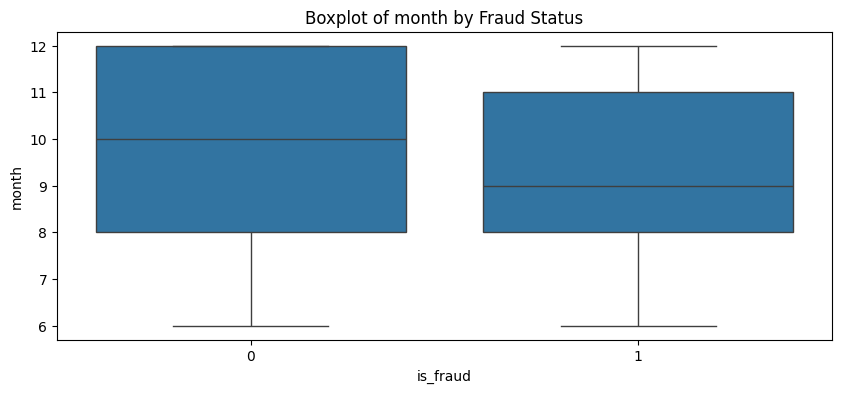

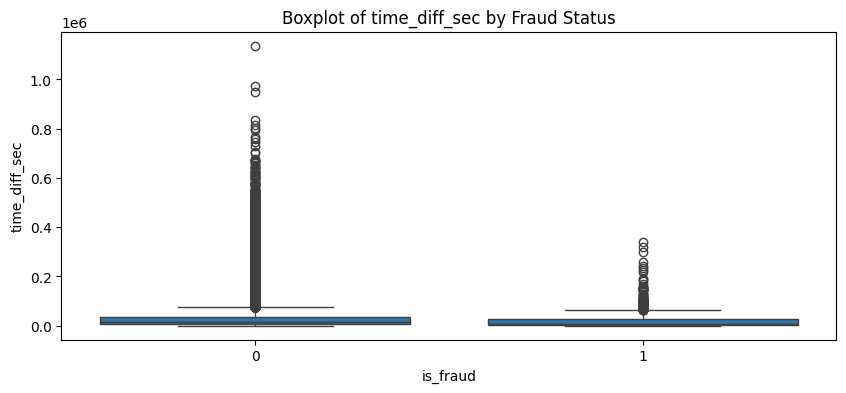

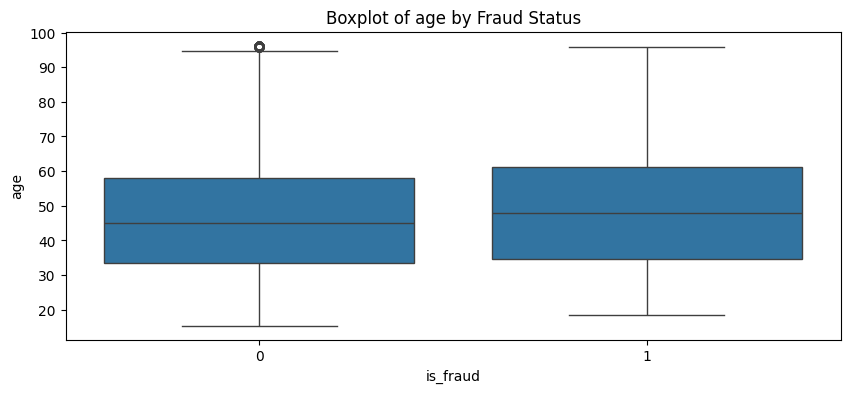

In [25]:
for col in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=col, hue='is_fraud', kde=True, element='step')
    plt.title(f'Distribution of {col} by Fraud Status')

for col in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=data, x='is_fraud', y=col)
    plt.title(f'Boxplot of {col} by Fraud Status')

In [26]:
from haversine import haversine
data['distance'] = data.apply(lambda x: haversine((x['lat'], x['long']),(x['merch_lat'], x['merch_long'])), axis=1)


Text(0.5, 1.0, 'Distribution of distance by Fraud Status')

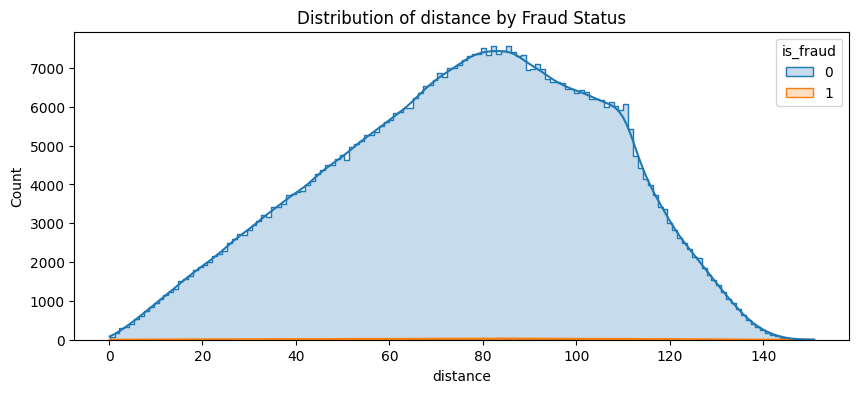

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='distance', hue='is_fraud', kde=True, element='step')
plt.title(f'Distribution of distance by Fraud Status')

In [28]:
data.drop(columns=['lat','long'],inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       555719 non-null  object 
 1   amt            555719 non-null  float64
 2   gender         555719 non-null  object 
 3   state          555719 non-null  object 
 4   city_pop       555719 non-null  int64  
 5   merch_lat      555719 non-null  float64
 6   merch_long     555719 non-null  float64
 7   is_fraud       555719 non-null  int64  
 8   hour           555719 non-null  int32  
 9   day            555719 non-null  int32  
 10  month          555719 non-null  int32  
 11  time_diff_sec  555719 non-null  float64
 12  age            555719 non-null  float64
 13  distance       555719 non-null  float64
dtypes: float64(6), int32(3), int64(2), object(3)
memory usage: 57.2+ MB


In [30]:
data.drop(columns=['merch_lat','merch_long'],inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       555719 non-null  object 
 1   amt            555719 non-null  float64
 2   gender         555719 non-null  object 
 3   state          555719 non-null  object 
 4   city_pop       555719 non-null  int64  
 5   is_fraud       555719 non-null  int64  
 6   hour           555719 non-null  int32  
 7   day            555719 non-null  int32  
 8   month          555719 non-null  int32  
 9   time_diff_sec  555719 non-null  float64
 10  age            555719 non-null  float64
 11  distance       555719 non-null  float64
dtypes: float64(4), int32(3), int64(2), object(3)
memory usage: 48.8+ MB


Text(0.5, 1.0, 'Boxplot of distance by Fraud Status')

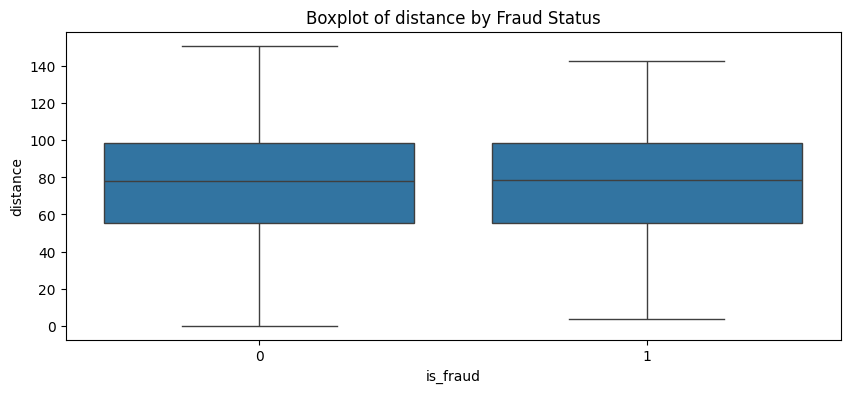

In [32]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=data, x='is_fraud', y='distance')
plt.title(f'Boxplot of distance by Fraud Status')

In [33]:
data.drop(columns=['day'],inplace=True)

In [34]:
fraud_rate_by_category = data.groupby('category')['is_fraud'].mean()
print(fraud_rate_by_category)

category
entertainment     0.001471
food_dining       0.001375
gas_transport     0.002732
grocery_net       0.002111
grocery_pos       0.009229
health_fitness    0.001418
home              0.001280
kids_pets         0.001335
misc_net          0.009756
misc_pos          0.002082
personal_care     0.001780
shopping_net      0.012111
shopping_pos      0.004278
travel            0.002292
Name: is_fraud, dtype: float64


In [35]:
data['category_encoded'] = data['category'].map(fraud_rate_by_category)

In [36]:
data.drop(columns=['category'],inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])

In [38]:
data['fraud_state_rate'] = data['state'].map(data.groupby('state')['is_fraud'].mean())

In [39]:
data

,amt,gender,state,city_pop,is_fraud,hour,month,time_diff_sec,age,distance,category_encoded,fraud_state_rate
157,124.66,0,WY,1645,0,13,6,13848.0,34.364384,30.457135,0.001280,0.001065
741,78.52,0,WY,1645,0,16,6,11994.0,34.364384,91.943062,0.002082,0.001065
3047,65.25,0,WY,1645,0,7,6,55977.0,34.367123,121.857588,0.002732,0.001065
4351,87.74,0,WY,1645,0,15,6,27238.0,34.367123,65.414254,0.001335,0.001065
7695,148.02,0,WY,1645,0,12,6,75383.0,34.369863,38.311326,0.001780,0.001065
...,...,...,...,...,...,...,...,...,...,...,...,...
552584,66.11,1,IL,532,0,2,12,8077.0,65.021918,44.885105,0.002732,0.004008
552892,4.58,1,IL,532,0,5,12,11005.0,65.021918,81.486028,0.009756,0.004008
553559,95.96,1,IL,532,0,11,12,21729.0,65.021918,36.046159,0.002732,0.004008
553560,149.48,1,IL,532,0,11,12,101.0,65.021918,81.769445,0.009229,0.004008


In [40]:
import numpy as np
data['amt'] = np.log1p(data['amt'])

In [41]:
data

,amt,gender,state,city_pop,is_fraud,hour,month,time_diff_sec,age,distance,category_encoded,fraud_state_rate
157,4.833580,0,WY,1645,0,13,6,13848.0,34.364384,30.457135,0.001280,0.001065
741,4.376009,0,WY,1645,0,16,6,11994.0,34.364384,91.943062,0.002082,0.001065
3047,4.193435,0,WY,1645,0,7,6,55977.0,34.367123,121.857588,0.002732,0.001065
4351,4.485711,0,WY,1645,0,15,6,27238.0,34.367123,65.414254,0.001335,0.001065
7695,5.004081,0,WY,1645,0,12,6,75383.0,34.369863,38.311326,0.001780,0.001065
...,...,...,...,...,...,...,...,...,...,...,...,...
552584,4.206333,1,IL,532,0,2,12,8077.0,65.021918,44.885105,0.002732,0.004008
552892,1.719189,1,IL,532,0,5,12,11005.0,65.021918,81.486028,0.009756,0.004008
553559,4.574299,1,IL,532,0,11,12,21729.0,65.021918,36.046159,0.002732,0.004008
553560,5.013830,1,IL,532,0,11,12,101.0,65.021918,81.769445,0.009229,0.004008


In [42]:
data['city_pop'] = np.log1p(data['city_pop'])


In [43]:
data['hour_group'] = pd.cut(data['hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data['hour_sin'] = np.sin(2*np.pi*data['hour']/24)
data['hour_cos'] = np.cos(2*np.pi*data['hour']/24)


In [44]:
data

,amt,gender,state,city_pop,is_fraud,hour,month,time_diff_sec,age,distance,category_encoded,fraud_state_rate,hour_group,hour_sin,hour_cos
157,4.833580,0,WY,7.406103,0,13,6,13848.0,34.364384,30.457135,0.001280,0.001065,Afternoon,-2.588190e-01,-0.965926
741,4.376009,0,WY,7.406103,0,16,6,11994.0,34.364384,91.943062,0.002082,0.001065,Afternoon,-8.660254e-01,-0.500000
3047,4.193435,0,WY,7.406103,0,7,6,55977.0,34.367123,121.857588,0.002732,0.001065,Morning,9.659258e-01,-0.258819
4351,4.485711,0,WY,7.406103,0,15,6,27238.0,34.367123,65.414254,0.001335,0.001065,Afternoon,-7.071068e-01,-0.707107
7695,5.004081,0,WY,7.406103,0,12,6,75383.0,34.369863,38.311326,0.001780,0.001065,Morning,1.224647e-16,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,4.206333,1,IL,6.278521,0,2,12,8077.0,65.021918,44.885105,0.002732,0.004008,Night,5.000000e-01,0.866025
552892,1.719189,1,IL,6.278521,0,5,12,11005.0,65.021918,81.486028,0.009756,0.004008,Night,9.659258e-01,0.258819
553559,4.574299,1,IL,6.278521,0,11,12,21729.0,65.021918,36.046159,0.002732,0.004008,Morning,2.588190e-01,-0.965926
553560,5.013830,1,IL,6.278521,0,11,12,101.0,65.021918,81.769445,0.009229,0.004008,Morning,2.588190e-01,-0.965926


<Axes: xlabel='hour_group', ylabel='count'>

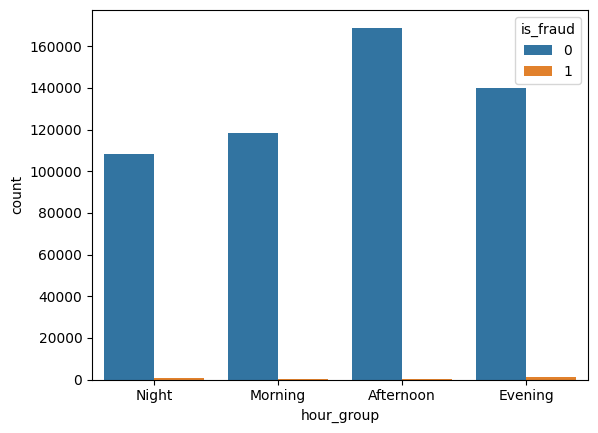

In [45]:
sns.countplot(data=data, x='hour_group', hue='is_fraud')

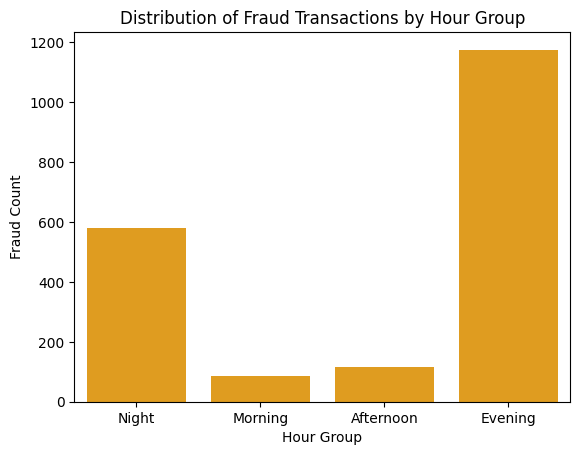

In [46]:
sns.countplot(data=data[data['is_fraud'] == 1], x='hour_group', color='orange')
plt.title('Distribution of Fraud Transactions by Hour Group')
plt.xlabel('Hour Group')
plt.ylabel('Fraud Count')
plt.show()


In [47]:
 
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

In [48]:
data.drop(columns=['hour','month'], inplace=True)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   amt               555719 non-null  float64 
 1   gender            555719 non-null  int32   
 2   state             555719 non-null  object  
 3   city_pop          555719 non-null  float64 
 4   is_fraud          555719 non-null  int64   
 5   time_diff_sec     555719 non-null  float64 
 6   age               555719 non-null  float64 
 7   distance          555719 non-null  float64 
 8   category_encoded  555719 non-null  float64 
 9   fraud_state_rate  555719 non-null  float64 
 10  hour_group        537566 non-null  category
 11  hour_sin          555719 non-null  float64 
 12  hour_cos          555719 non-null  float64 
 13  month_sin         555719 non-null  float64 
 14  month_cos         555719 non-null  float64 
dtypes: category(1), float64(11), int32(1), int64(1), objec

In [50]:
# Option 1: Fill missing with most frequent (likely 'Afternoon' or 'Evening')
data['hour_group'].fillna(data['hour_group'].mode()[0], inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_13320\1354527313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['hour_group'].fillna(data['hour_group'].mode()[0], inplace=True)


In [51]:
data['age_group'] = pd.cut(data['age'], bins=[0,25,40,60,100], labels=['Young','Adult','MidAge','Senior'])

<Axes: xlabel='age_group', ylabel='count'>

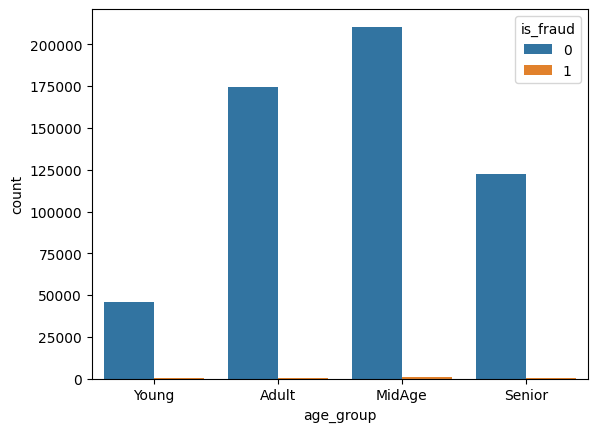

In [52]:
sns.countplot(data=data, x='age_group', hue='is_fraud')

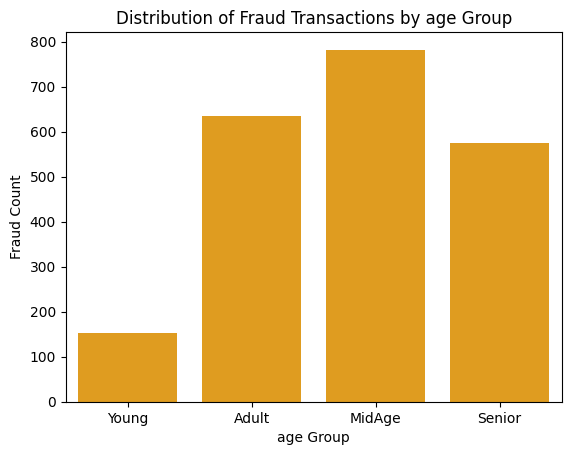

In [53]:
sns.countplot(data=data[data['is_fraud'] == 1], x='age_group', color='orange')
plt.title('Distribution of Fraud Transactions by age Group')
plt.xlabel('age Group')
plt.ylabel('Fraud Count')
plt.show()

In [54]:
from sklearn.preprocessing import OrdinalEncoder
data['age_group'] = OrdinalEncoder().fit_transform(data[['age_group']])
data['hour_group'] = OrdinalEncoder().fit_transform(data[['hour_group']])

In [55]:
data

,amt,gender,state,city_pop,is_fraud,time_diff_sec,age,distance,category_encoded,fraud_state_rate,hour_group,hour_sin,hour_cos,month_sin,month_cos,age_group
157,4.833580,0,WY,7.406103,0,13848.0,34.364384,30.457135,0.001280,0.001065,0.0,-2.588190e-01,-0.965926,1.224647e-16,-1.0,0.0
741,4.376009,0,WY,7.406103,0,11994.0,34.364384,91.943062,0.002082,0.001065,0.0,-8.660254e-01,-0.500000,1.224647e-16,-1.0,0.0
3047,4.193435,0,WY,7.406103,0,55977.0,34.367123,121.857588,0.002732,0.001065,2.0,9.659258e-01,-0.258819,1.224647e-16,-1.0,0.0
4351,4.485711,0,WY,7.406103,0,27238.0,34.367123,65.414254,0.001335,0.001065,0.0,-7.071068e-01,-0.707107,1.224647e-16,-1.0,0.0
7695,5.004081,0,WY,7.406103,0,75383.0,34.369863,38.311326,0.001780,0.001065,2.0,1.224647e-16,-1.000000,1.224647e-16,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,4.206333,1,IL,6.278521,0,8077.0,65.021918,44.885105,0.002732,0.004008,3.0,5.000000e-01,0.866025,-2.449294e-16,1.0,2.0
552892,1.719189,1,IL,6.278521,0,11005.0,65.021918,81.486028,0.009756,0.004008,3.0,9.659258e-01,0.258819,-2.449294e-16,1.0,2.0
553559,4.574299,1,IL,6.278521,0,21729.0,65.021918,36.046159,0.002732,0.004008,2.0,2.588190e-01,-0.965926,-2.449294e-16,1.0,2.0
553560,5.013830,1,IL,6.278521,0,101.0,65.021918,81.769445,0.009229,0.004008,2.0,2.588190e-01,-0.965926,-2.449294e-16,1.0,2.0


In [56]:
data["age"]=data["age"].astype('int')

In [57]:
data

,amt,gender,state,city_pop,is_fraud,time_diff_sec,age,distance,category_encoded,fraud_state_rate,hour_group,hour_sin,hour_cos,month_sin,month_cos,age_group
157,4.833580,0,WY,7.406103,0,13848.0,34,30.457135,0.001280,0.001065,0.0,-2.588190e-01,-0.965926,1.224647e-16,-1.0,0.0
741,4.376009,0,WY,7.406103,0,11994.0,34,91.943062,0.002082,0.001065,0.0,-8.660254e-01,-0.500000,1.224647e-16,-1.0,0.0
3047,4.193435,0,WY,7.406103,0,55977.0,34,121.857588,0.002732,0.001065,2.0,9.659258e-01,-0.258819,1.224647e-16,-1.0,0.0
4351,4.485711,0,WY,7.406103,0,27238.0,34,65.414254,0.001335,0.001065,0.0,-7.071068e-01,-0.707107,1.224647e-16,-1.0,0.0
7695,5.004081,0,WY,7.406103,0,75383.0,34,38.311326,0.001780,0.001065,2.0,1.224647e-16,-1.000000,1.224647e-16,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,4.206333,1,IL,6.278521,0,8077.0,65,44.885105,0.002732,0.004008,3.0,5.000000e-01,0.866025,-2.449294e-16,1.0,2.0
552892,1.719189,1,IL,6.278521,0,11005.0,65,81.486028,0.009756,0.004008,3.0,9.659258e-01,0.258819,-2.449294e-16,1.0,2.0
553559,4.574299,1,IL,6.278521,0,21729.0,65,36.046159,0.002732,0.004008,2.0,2.588190e-01,-0.965926,-2.449294e-16,1.0,2.0
553560,5.013830,1,IL,6.278521,0,101.0,65,81.769445,0.009229,0.004008,2.0,2.588190e-01,-0.965926,-2.449294e-16,1.0,2.0


In [58]:
data.sample(10)

,amt,gender,state,city_pop,is_fraud,time_diff_sec,age,distance,category_encoded,fraud_state_rate,hour_group,hour_sin,hour_cos,month_sin,month_cos,age_group
272790,4.608465,1,VT,4.948760,0,7493.0,30,98.451908,0.009229,0.000000,3.0,2.588190e-01,0.965926,-1.000000e+00,-1.836970e-16,0.0
510185,3.724970,0,GA,9.239511,0,13531.0,23,77.310868,0.001418,0.005143,1.0,-9.659258e-01,0.258819,-2.449294e-16,1.000000e+00,3.0
119971,2.359910,0,OH,11.237225,0,30941.0,63,68.603895,0.002292,0.001936,0.0,-5.000000e-01,-0.866025,-8.660254e-01,-5.000000e-01,2.0
432719,4.088326,1,NE,7.697575,0,31948.0,46,80.066569,0.002111,0.003510,3.0,7.071068e-01,0.707107,-2.449294e-16,1.000000e+00,1.0
193810,4.472438,0,MI,8.774931,0,38585.0,41,91.764197,0.012111,0.003101,0.0,-2.588190e-01,-0.965926,-8.660254e-01,-5.000000e-01,1.0
422211,2.763170,1,MI,6.523562,0,27498.0,53,36.733998,0.001280,0.003101,1.0,-2.588190e-01,0.965926,-2.449294e-16,1.000000e+00,1.0
353660,3.456947,0,WV,6.729824,0,8563.0,39,64.399033,0.001471,0.000000,1.0,-9.659258e-01,0.258819,-5.000000e-01,8.660254e-01,0.0
30794,3.313822,0,MD,9.371779,0,8756.0,56,72.858988,0.001418,0.004125,2.0,1.224647e-16,-1.000000,-5.000000e-01,-8.660254e-01,1.0
554006,1.986504,0,IL,7.388946,0,67888.0,30,102.567367,0.012111,0.004008,0.0,-5.000000e-01,-0.866025,-2.449294e-16,1.000000e+00,0.0
12997,4.321214,0,MO,8.244334,0,20288.0,69,71.565493,0.001375,0.004303,0.0,-5.000000e-01,-0.866025,1.224647e-16,-1.000000e+00,2.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt               555719 non-null  float64
 1   gender            555719 non-null  int32  
 2   state             555719 non-null  object 
 3   city_pop          555719 non-null  float64
 4   is_fraud          555719 non-null  int64  
 5   time_diff_sec     555719 non-null  float64
 6   age               555719 non-null  int32  
 7   distance          555719 non-null  float64
 8   category_encoded  555719 non-null  float64
 9   fraud_state_rate  555719 non-null  float64
 10  hour_group        555719 non-null  float64
 11  hour_sin          555719 non-null  float64
 12  hour_cos          555719 non-null  float64
 13  month_sin         555719 non-null  float64
 14  month_cos         555719 non-null  float64
 15  age_group         555719 non-null  float64
dtypes: float64(12), int32(2

(array([5.35992e+05, 1.61340e+04, 2.71500e+03, 6.79000e+02, 1.49000e+02,
        3.70000e+01, 6.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([      0. ,  113694.4,  227388.8,  341083.2,  454777.6,  568472. ,
         682166.4,  795860.8,  909555.2, 1023249.6, 1136944. ]),
 <BarContainer object of 10 artists>)

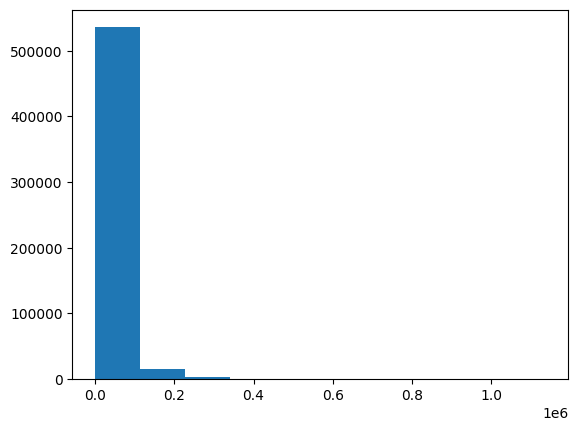

In [60]:
plt.hist(data["time_diff_sec"])

In [61]:
data["time_diff_sec"]=np.log1p(data["time_diff_sec"])

(array([1.44000e+02, 4.56000e+02, 1.78000e+03, 6.77900e+03, 2.63480e+04,
        8.65250e+04, 1.92462e+05, 1.90631e+05, 4.88330e+04, 1.76100e+03]),
 array([ 0.        ,  1.39438554,  2.78877108,  4.18315662,  5.57754216,
         6.9719277 ,  8.36631324,  9.76069878, 11.15508432, 12.54946986,
        13.9438554 ]),
 <BarContainer object of 10 artists>)

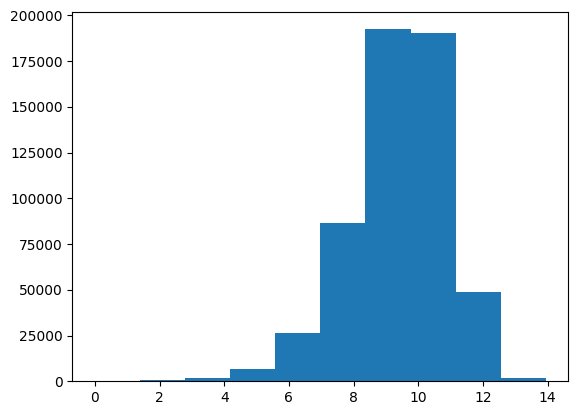

In [62]:
plt.hist(data["time_diff_sec"])

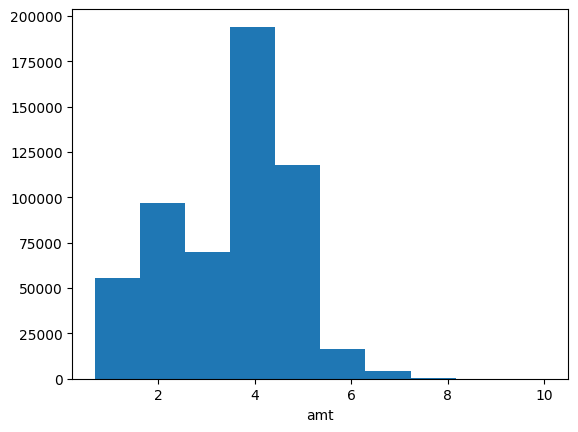

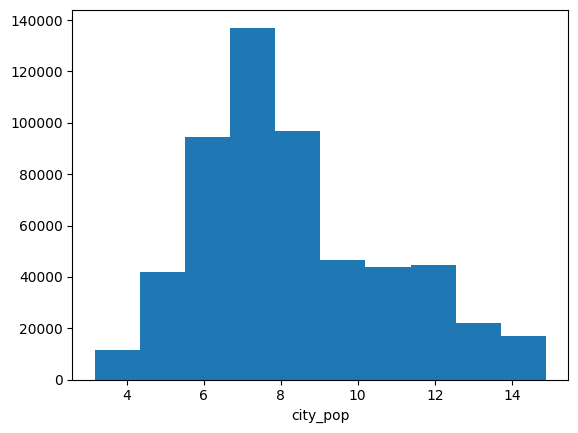

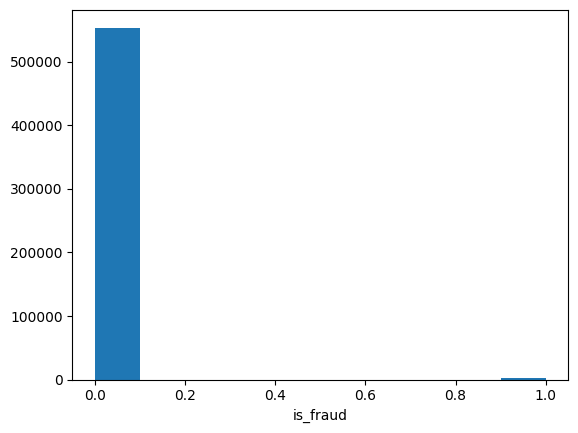

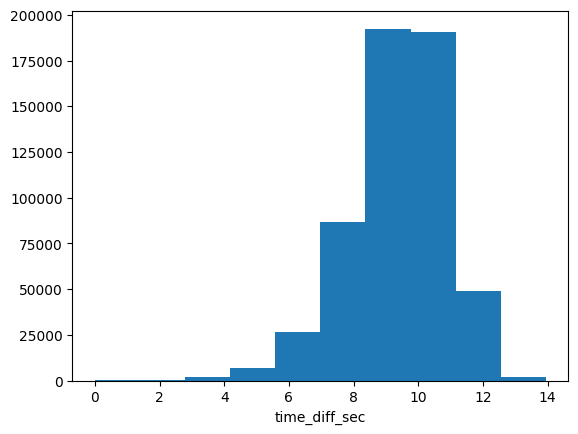

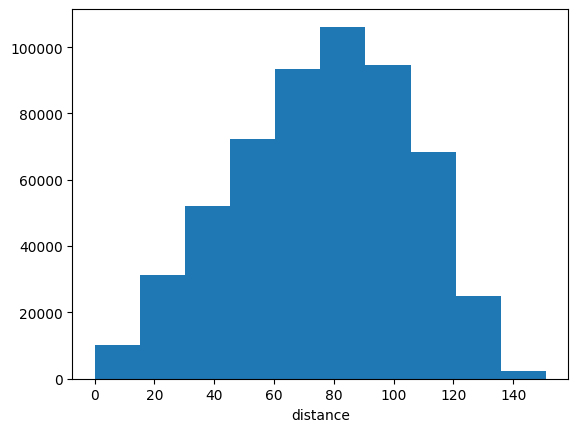

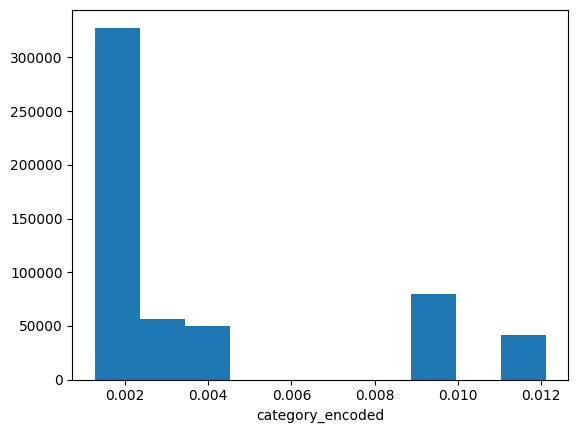

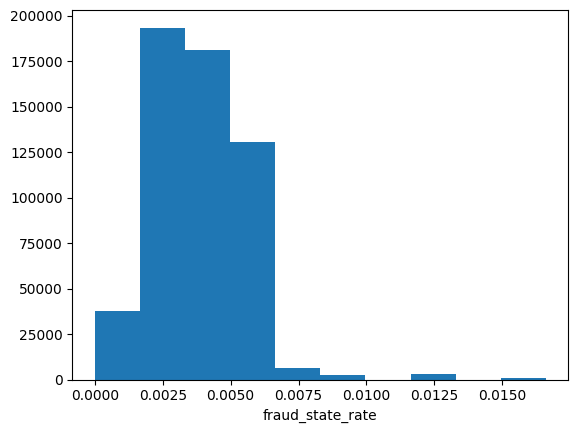

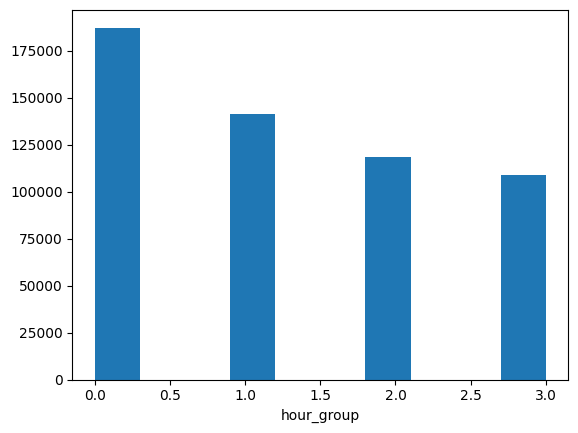

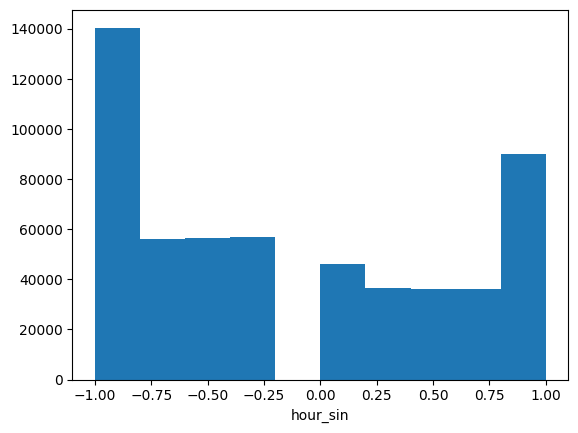

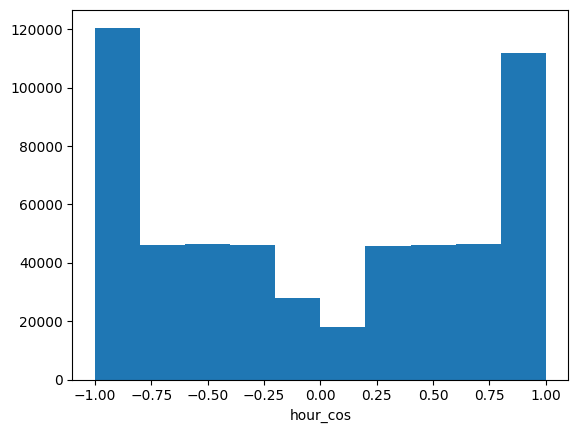

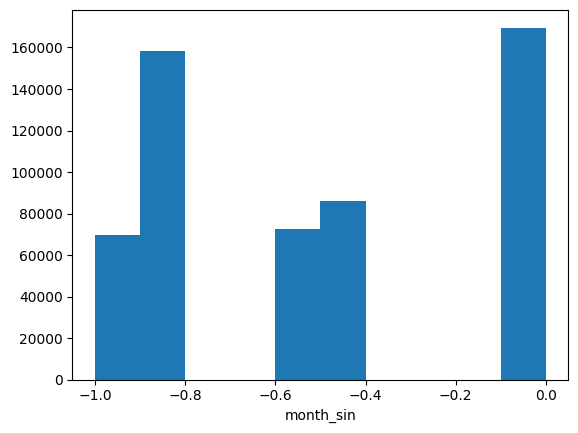

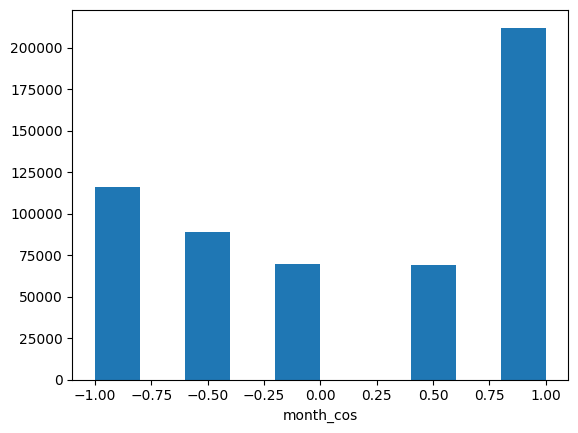

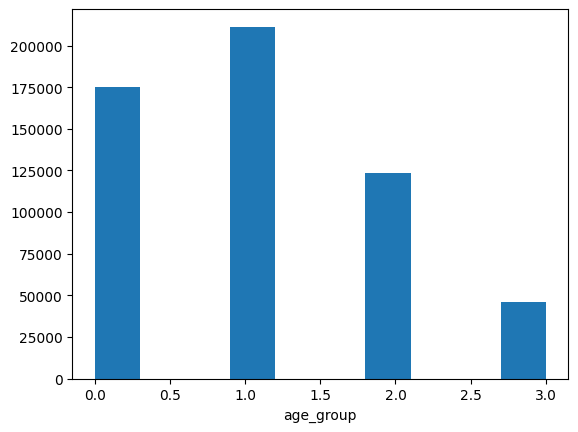

In [63]:
for col in data.select_dtypes(include=["int64","float64"]).columns:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.show()

In [64]:
data["hour_group"]=data["hour_group"].astype(int)

In [65]:
state_freq = data['state'].value_counts(normalize=True).to_dict()
data['state'] = data['state'].map(state_freq)

In [66]:
data

,amt,gender,state,city_pop,is_fraud,time_diff_sec,age,distance,category_encoded,fraud_state_rate,hour_group,hour_sin,hour_cos,month_sin,month_cos,age_group
157,4.833580,0,0.015213,7.406103,0,9.535968,34,30.457135,0.001280,0.001065,0,-2.588190e-01,-0.965926,1.224647e-16,-1.0,0.0
741,4.376009,0,0.015213,7.406103,0,9.392245,34,91.943062,0.002082,0.001065,0,-8.660254e-01,-0.500000,1.224647e-16,-1.0,0.0
3047,4.193435,0,0.015213,7.406103,0,10.932714,34,121.857588,0.002732,0.001065,2,9.659258e-01,-0.258819,1.224647e-16,-1.0,0.0
4351,4.485711,0,0.015213,7.406103,0,10.212405,34,65.414254,0.001335,0.001065,0,-7.071068e-01,-0.707107,1.224647e-16,-1.0,0.0
7695,5.004081,0,0.015213,7.406103,0,11.230350,34,38.311326,0.001780,0.001065,2,1.224647e-16,-1.000000,1.224647e-16,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,4.206333,1,0.034118,6.278521,0,8.996900,65,44.885105,0.002732,0.004008,3,5.000000e-01,0.866025,-2.449294e-16,1.0,2.0
552892,1.719189,1,0.034118,6.278521,0,9.306196,65,81.486028,0.009756,0.004008,3,9.659258e-01,0.258819,-2.449294e-16,1.0,2.0
553559,4.574299,1,0.034118,6.278521,0,9.986449,65,36.046159,0.002732,0.004008,2,2.588190e-01,-0.965926,-2.449294e-16,1.0,2.0
553560,5.013830,1,0.034118,6.278521,0,4.624973,65,81.769445,0.009229,0.004008,2,2.588190e-01,-0.965926,-2.449294e-16,1.0,2.0


In [67]:

# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning components
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    f1_score, precision_score, recall_score, make_scorer
)

# Fix random state for reproducibility
RND = 42


In [68]:
# Drop the target variable to form the feature matrix
X = data.drop(columns=['is_fraud'])
y = data['is_fraud'].astype(int)  # ensure integer type

print("Feature matrix (X) shape:", X.shape)
print("Target (y) distribution:\n", y.value_counts(normalize=True))


Feature matrix (X) shape: (555719, 15)
Target (y) distribution:
 is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64


In [69]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Define the model with GPU support
xgb_clf = xgb.XGBClassifier(
    tree_method="gpu_hist",     # GPU accelerated histogram algorithm
    predictor="gpu_predictor",  # GPU prediction
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=RND
)

# Parameter search space
param_dist_xgb = {
    "n_estimators": [200, 400, 600],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "scale_pos_weight": [250, 260, 270]  # imbalance handling (normal/fraud ratio ≈ 553k/2k ≈ 258)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RND)
f1_scorer = make_scorer(f1_score)

# Randomized search
rnd_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=15,
    scoring=f1_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=RND
)

# Fit
rnd_xgb.fit(X, y)

print("Best Parameters (XGBoost):")
print(rnd_xgb.best_params_)

# Best model
best_xgb = rnd_xgb.best_estimator_

# Predictions
y_pred = best_xgb.predict(X)

print("XGBoost Results:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("ROC–AUC:", roc_auc_score(y, y_pred))


Fitting 3 folds for each of 15 candidates, totalling 45 fits


KeyboardInterrupt: 

In [ ]:
y_proba = best_xgb.predict_proba(X_test)[:,1]
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)

best_thresh = thresholds[f1_scores.argmax()]


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_xgb, X, y, cv=5, scoring="f1")
print("Cross‑validated F1 scores:", scores)
print("Mean F1:", scores.mean())


c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboo

Cross‑validated F1 scores: [0.82629108 0.82056893 0.77265973 0.78489703 0.76948052]
Mean F1: 0.7947794569590293


c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


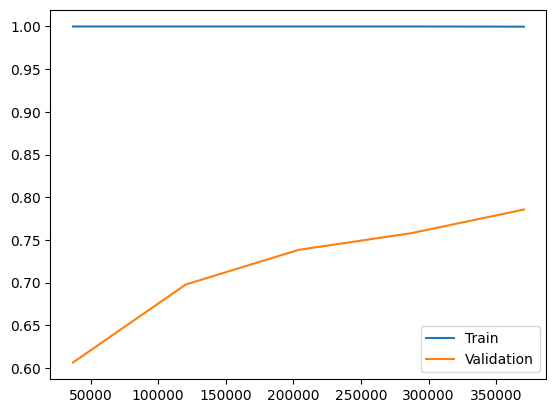

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X, y, cv=3, scoring="f1", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation")
plt.legend()
plt.show()


c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:42:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:42:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:42:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboo

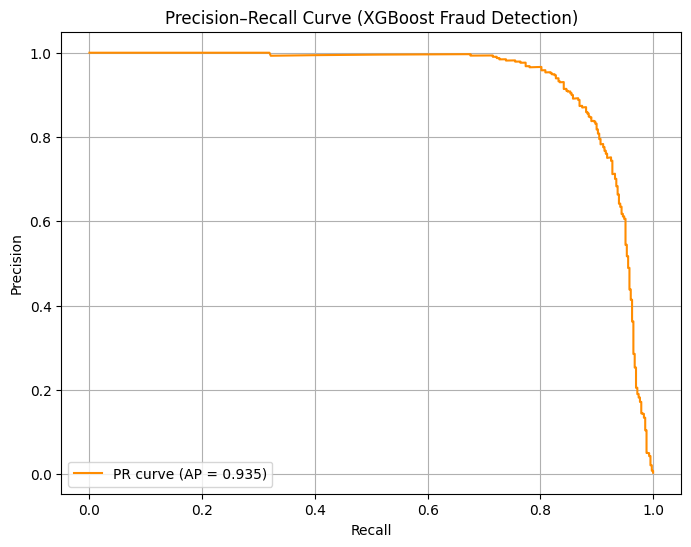

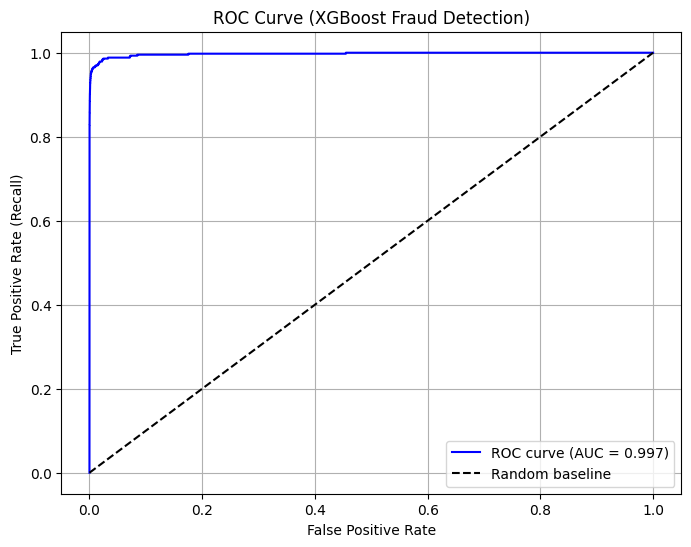

In [ ]:
# -------------------------------
# Train/Test Split
# -------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RND, stratify=y
)

# Fit the tuned model on training data
best_xgb.fit(X_train, y_train)

# -------------------------------
# Precision–Recall Curve
# -------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get fraud probabilities from the model
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Compute precision–recall pairs
prec, rec, thresh = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(rec, prec, label=f"PR curve (AP = {avg_prec:.3f})", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (XGBoost Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# ROC Curve
# -------------------------------
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})", color="blue")
plt.plot([0,1], [0,1], "k--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (XGBoost Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import shutil
shutil.copy("fraudTest.csv", "fraudTest_original_backup.csv")


'fraudTest_original_backup.csv'

In [70]:
import pandas as pd
from pandas.api.types import is_object_dtype


suspects = []

for col in X.columns:
    # NEW (correct) categorical check
    is_cat = isinstance(X[col].dtype, pd.CategoricalDtype)
    
    # Object/string check
    is_obj = is_object_dtype(X[col])
    
    if is_obj or is_cat:
        s = X[col].astype(str).str.lower()
        mask = s.str.contains("fraud")
        if mask.any():
            suspects.append((col, s[mask].unique()[:10]))

print("Potential leakage columns:", [c for c, _ in suspects])

for c, vals in suspects:
    print("Column:", c, "examples:", vals[:10])


Potential leakage columns: []


In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


# Encode categorical columns temporarily
X_enc = X.copy()
for col in X_enc.columns:
    if X_enc[col].dtype == "object":
        X_enc[col] = LabelEncoder().fit_transform(X_enc[col].astype(str))

# 1. Pearson correlation (numeric leakage)
corr = pd.concat([
    X_enc.corrwith(y).abs().sort_values(ascending=False).head(15)
], axis=1)
corr.columns = ["abs_corr_with_target"]

# 2. Mutual information (nonlinear leakage)
mi = mutual_info_classif(X_enc, y, discrete_features="auto")
mi_series = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False).head(15)

print("=== Top Potential Leakage Signals (Pearson) ===")
print(corr)

print("\n=== Top Potential Leakage Signals (Mutual Info) ===")
print(mi_series)


=== Top Potential Leakage Signals (Pearson) ===
                  abs_corr_with_target
amt                           0.098374
hour_cos                      0.065670
category_encoded              0.057733
time_diff_sec                 0.034067
fraud_state_rate              0.028404
month_sin                     0.018008
month_cos                     0.009839
hour_group                    0.009489
age                           0.007409
state                         0.004513
hour_sin                      0.003115
age_group                     0.002804
city_pop                      0.000879
gender                        0.000748
distance                      0.000233

=== Top Potential Leakage Signals (Mutual Info) ===
gender              7.314378e-02
age_group           4.002469e-02
month_sin           3.684003e-02
hour_group          2.596975e-02
month_cos           2.333709e-02
hour_sin            1.171210e-02
amt                 1.169026e-02
hour_cos            1.163365e-02
category_en

In [72]:
data["is_fraud"].value_counts(normalize=True)


is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt               555719 non-null  float64
 1   gender            555719 non-null  int32  
 2   state             555719 non-null  float64
 3   city_pop          555719 non-null  float64
 4   is_fraud          555719 non-null  int64  
 5   time_diff_sec     555719 non-null  float64
 6   age               555719 non-null  int32  
 7   distance          555719 non-null  float64
 8   category_encoded  555719 non-null  float64
 9   fraud_state_rate  555719 non-null  float64
 10  hour_group        555719 non-null  int32  
 11  hour_sin          555719 non-null  float64
 12  hour_cos          555719 non-null  float64
 13  month_sin         555719 non-null  float64
 14  month_cos         555719 non-null  float64
 15  age_group         555719 non-null  float64
dtypes: float64(12), int32(3

In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    f1_score, make_scorer, classification_report,
    confusion_matrix, roc_auc_score
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# =====================================================
# 1. SPLIT DATA
# =====================================================
X = data.drop(columns=['is_fraud'])
y = data['is_fraud'].astype(int)

print("Target distribution:\n", y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y,
    random_state=RND
)

print("\nTrain:", X_train.shape, " Test:", X_test.shape)

# =====================================================
# 2. COLUMN SELECTION
# =====================================================
# Correct categorical-int columns
categorical_cols = ['gender', 'hour_group', 'age_group']

# Numeric = everything else except target + categorical
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Example: Remove log1p columns that already transformed (if you tracked these)
# numeric_cols.remove("log_amt")  # example

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# =====================================================
# 3. PREPROCESSING (Scaling only for SMOTE)
#    XGBoost does NOT require scaling — but SMOTE does.
# =====================================================

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', 'passthrough', categorical_cols)
    ],
    remainder='drop',
    sparse_threshold=0
)

# =====================================================
# 4. BUILD PIPELINE WITH SMOTE + XGBOOST
# =====================================================

xgb_clf = xgb.XGBClassifier(
    tree_method="hist",
    device="cuda",
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=RND
)

param_dist_xgb = {
    "xgb__n_estimators": [200, 400, 600],
    "xgb__max_depth": [4, 6, 8],
    "xgb__learning_rate": [0.05, 0.1, 0.2],
    "xgb__subsample": [0.6, 0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8, 1.0],
    "xgb__scale_pos_weight": [250, 260, 270]
}

pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=RND)),
    ('to_float32', FunctionTransformer(lambda x: x.astype(np.float32))),
    ('xgb', xgb_clf)
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RND)
f1_scorer = make_scorer(f1_score)
rnd_xgb = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist_xgb,
    n_iter=15,
    scoring=f1_scorer,
    cv=cv,
    verbose=1,
    random_state=RND,
    n_jobs=1  # <--- critical for Windows + XGBoost GPU
)

# =====================================================
# 5. TRAIN THE MODEL
# =====================================================
rnd_xgb.fit(X_train, y_train)

print("\nBest Parameters:")
print(rnd_xgb.best_params_)

best_model = rnd_xgb.best_estimator_

# =====================================================
# 6. EVALUATE ON TEST SET
# =====================================================
y_pred = best_model.predict(X_test)

print("\n=== XGBoost Results (Test Set) ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC–AUC:", roc_auc_score(y_test, y_pred))


Target distribution:
 is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

Train: (444575, 15)  Test: (111144, 15)

Numeric columns: ['amt', 'state', 'city_pop', 'time_diff_sec', 'age', 'distance', 'category_encoded', 'fraud_state_rate', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Categorical columns: ['gender', 'hour_group', 'age_group']
Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)



Best Parameters:
{'xgb__subsample': 0.6, 'xgb__scale_pos_weight': 250, 'xgb__n_estimators': 400, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.2, 'xgb__colsample_bytree': 0.8}

=== XGBoost Results (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.82      0.86      0.84       429

    accuracy                           1.00    111144
   macro avg       0.91      0.93      0.92    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
[[110636     79]
 [    61    368]]
ROC–AUC: 0.9285476570126348


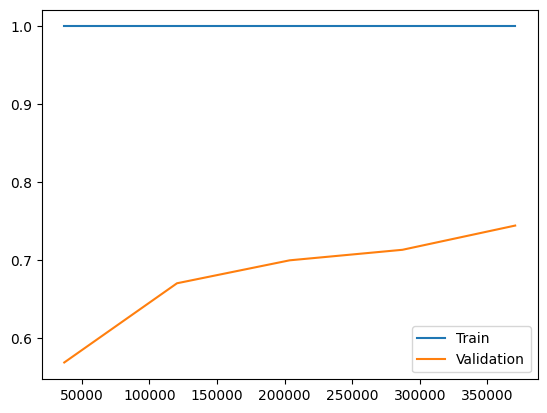

In [75]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=3, scoring="f1", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation")
plt.legend()
plt.show()


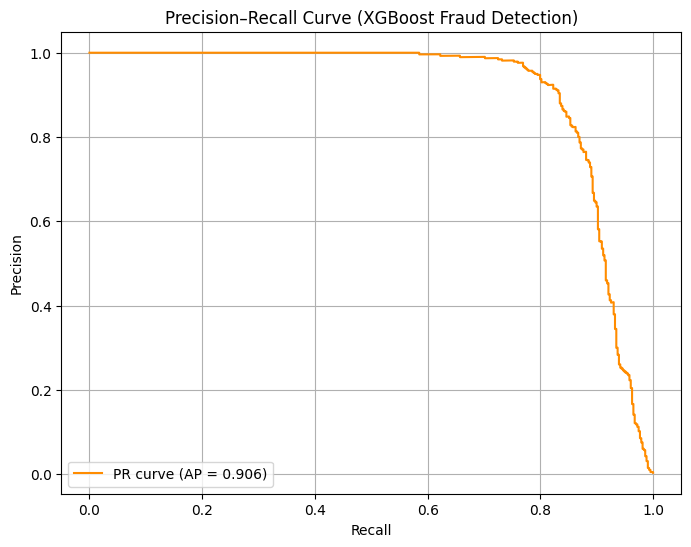

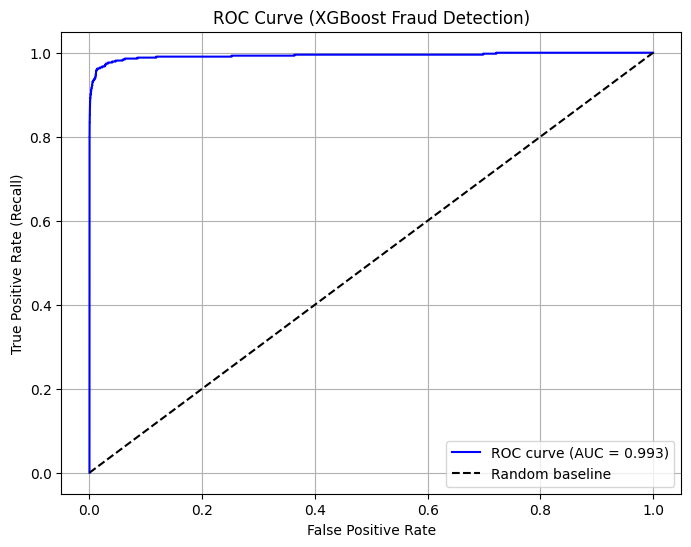

In [76]:
# -------------------------------
# Train/Test Split
# -------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RND, stratify=y
)

# Fit the tuned model on training data
best_model.fit(X_train, y_train)

# -------------------------------
# Precision–Recall Curve
# -------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get fraud probabilities from the model
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision–recall pairs
prec, rec, thresh = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(rec, prec, label=f"PR curve (AP = {avg_prec:.3f})", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (XGBoost Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# ROC Curve
# -------------------------------
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})", color="blue")
plt.plot([0,1], [0,1], "k--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (XGBoost Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()



In [77]:
# ==================================================
# MODEL DIAGNOSTIC DATA COLLECTION
# ==================================================

import numpy as np
import pandas as pd
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_curve, roc_curve,
    roc_auc_score, average_precision_score
)
import matplotlib.pyplot as plt

# ---- 1. Predictions & probabilities ----
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n===== Shape Info =====")
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_proba shape:", y_proba.shape)

# ---- 2. Basic metrics ----
print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred))

print("\n===== Confusion Matrix =====")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ---- 3. ROC metrics ----
fpr, tpr, roc_thresh = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC AUC:", roc_auc)

# ---- 4. Precision–Recall metrics ----
precision, recall, pr_thresh = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)
print("Average PR (AP):", ap_score)

# ---- 5. Compute optimal threshold candidates ----
# F1-optimal threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_f1_index = np.argmax(f1_scores)
best_f1_threshold = pr_thresh[best_f1_index-1] if best_f1_index > 0 else 0.5

# Youden’s J (ROC optimal)
j_scores = tpr - fpr
best_j_index = np.argmax(j_scores)
best_j_threshold = roc_thresh[best_j_index]

print("\n===== Thresholds =====")
print("Best F1 threshold:", best_f1_threshold)
print("Best J Index threshold:", best_j_threshold)

# ---- 6. Calibration metrics ----
# Binning calibration error
bins = np.linspace(0, 1, 11)
bin_ids = np.digitize(y_proba, bins) - 1
bin_df = pd.DataFrame({"prob": y_proba, "actual": y_test, "bin": bin_ids})
calibration_table = bin_df.groupby("bin").agg(
    avg_pred_prob=("prob", "mean"),
    true_rate=("actual", "mean"),
    count=("actual", "count")
)

print("\n===== Calibration Table =====")
print(calibration_table)

# ---- 7. Output everything cleanly ----
output = {
    "roc_auc": roc_auc,
    "ap_score": ap_score,
    "best_f1_threshold": best_f1_threshold,
    "best_j_threshold": best_j_threshold,
    "confusion_matrix": cm,
}

print("\n\n===== SUMMARY OUTPUT =====")
print(output)



===== Shape Info =====
y_test shape: (111144,)
y_pred shape: (111144,)
y_proba shape: (111144,)

===== Classification Report =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.82      0.86      0.84       429

    accuracy                           1.00    111144
   macro avg       0.91      0.93      0.92    111144
weighted avg       1.00      1.00      1.00    111144


===== Confusion Matrix =====
[[110636     79]
 [    61    368]]

ROC AUC: 0.9933833346650038
Average PR (AP): 0.9063401845852008

===== Thresholds =====
Best F1 threshold: 0.82626307
Best J Index threshold: 0.00073596026

===== Calibration Table =====
     avg_pred_prob  true_rate   count
bin                                  
0         0.000143   0.000407  110555
1         0.139129   0.041096      73
2         0.250562   0.205882      34
3         0.349490   0.117647      17
4         0.446840   0.222222      18
5         0.548103   0

In [78]:
errors = X_test.copy()
errors["y_true"] = y_test
errors["y_pred"] = y_pred
errors["y_proba"] = y_proba

false_pos = errors[(errors.y_true == 0) & (errors.y_pred == 1)]
false_neg = errors[(errors.y_true == 1) & (errors.y_pred == 0)]

print("False Positives:", false_pos.shape)
print("False Negatives:", false_neg.shape)

false_pos.describe()
false_neg.describe()




False Positives: (79, 18)
False Negatives: (61, 18)


,amt,gender,state,city_pop,time_diff_sec,age,distance,category_encoded,fraud_state_rate,hour_group,hour_sin,hour_cos,month_sin,month_cos,age_group,y_true,y_pred,y_proba
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.00000,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000,61.0,61.0,6.100000e+01
mean,3.715736,0.344262,0.029934,7.988070,9.201064,46.573770,72.609903,0.002164,0.004873,0.95082,-0.445132,0.542391,-6.298129e-01,6.718158e-02,0.868852,1.0,0.0,8.820271e-02
std,1.332060,0.479070,0.021029,1.676186,1.906451,15.553627,34.540625,0.002158,0.002474,0.64359,0.367450,0.617343,3.367363e-01,7.038547e-01,0.826144,0.0,0.0,1.427770e-01
min,1.095273,0.000000,0.005897,4.158883,4.189655,22.000000,16.673238,0.001280,0.001065,0.00000,-1.000000,-0.965926,-1.000000e+00,-1.000000e+00,0.000000,1.0,0.0,4.201827e-09
25%,3.005187,0.000000,0.014056,7.113956,7.857868,35.000000,50.184214,0.001335,0.002928,1.00000,-0.707107,0.258819,-8.660254e-01,-5.000000e-01,0.000000,1.0,0.0,3.989863e-04
50%,3.136363,0.000000,0.022504,7.773594,9.312265,43.000000,69.368638,0.001471,0.004303,1.00000,-0.500000,0.866025,-8.660254e-01,-1.836970e-16,1.000000,1.0,0.0,8.822143e-03
75%,4.772632,1.000000,0.034118,9.168268,10.890926,52.000000,96.796718,0.001780,0.005997,1.00000,-0.258819,0.965926,-5.000000e-01,8.660254e-01,1.000000,1.0,0.0,1.096437e-01
max,7.033965,1.000000,0.072686,12.313967,12.465995,87.000000,142.850098,0.012111,0.012206,3.00000,0.965926,1.000000,1.224647e-16,1.000000e+00,3.000000,1.0,0.0,4.886132e-01


In [79]:
noise_test = X_test.copy()
noise_test["amt"] *= np.random.uniform(0.95, 1.05, len(noise_test))

y_noise = best_model.predict_proba(noise_test)[:,1]
print(np.corrcoef(y_noise, y_proba)[0,1])


0.8917084039044895


In [80]:
for col in ["gender", "age_group", "hour_group"]:
    print("\n=== Fairness check:", col, "===")
    print(errors.groupby(col)["y_proba"].mean())



=== Fairness check: gender ===
gender
0    0.004468
1    0.003922
Name: y_proba, dtype: float32

=== Fairness check: age_group ===
age_group
0.0    0.004155
1.0    0.003863
2.0    0.004755
3.0    0.004711
Name: y_proba, dtype: float32

=== Fairness check: hour_group ===
hour_group
0    0.001654
1    0.009753
2    0.000621
3    0.005400
Name: y_proba, dtype: float32


In [81]:
seeds = [1,2,3,4,5]
scores = []

for s in seeds:
    xgb_temp = xgb.XGBClassifier(device="cuda", tree_method="hist", eval_metric="logloss", random_state=s)
    pipe_temp = ImbPipeline([
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=s)),
        ('to_float32', FunctionTransformer(lambda x: x.astype(np.float32))),
        ('xgb', xgb_temp)
    ])
    pipe_temp.fit(X_train, y_train)
    y_temp = pipe_temp.predict(X_test)
    scores.append(f1_score(y_test, y_temp))

scores


[0.833530106257379,
 0.8220436280137773,
 0.8348837209302326,
 0.8225616921269095,
 0.8128724672228844]

In [82]:
# FP/FN detail + comparison with overall distribution
errors = X_test.copy()
errors["y_true"] = y_test.values
errors["y_pred"] = y_pred
errors["y_proba"] = y_proba

false_pos = errors[(errors.y_true==0)&(errors.y_pred==1)]
false_neg = errors[(errors.y_true==1)&(errors.y_pred==0)]

print("False Positives:", false_pos.shape)
print("False Negatives:", false_neg.shape)

# Show top features for FP/FN (value counts + describe)
cols = ['amt','distance','time_diff_sec','category_encoded','fraud_state_rate','hour_group','age_group']
print("\n-- FP describe --")
display(false_pos[cols].describe().T)
print("\n-- FN describe --")
display(false_neg[cols].describe().T)

# Compare to overall test set
print("\n-- Overall test describe --")
display(X_test[cols].describe().T)

# Show a few example FN records for manual inspection
display(false_neg.head(10))


False Positives: (79, 18)
False Negatives: (61, 18)

-- FP describe --


,count,mean,std,min,25%,50%,75%,max
amt,79.0,4.907631,1.639090,2.151762,3.159741,5.494295,6.598693,7.329245
distance,79.0,84.394521,24.680047,26.278447,66.719992,85.863670,103.937415,122.459395
time_diff_sec,79.0,8.357761,1.694071,4.584967,7.198728,8.213111,9.631499,11.494385
category_encoded,79.0,0.004467,0.004276,0.001280,0.001418,0.001780,0.009756,0.012111
fraud_state_rate,79.0,0.004052,0.001330,0.001936,0.003101,0.003510,0.005143,0.008835
hour_group,79.0,1.303797,0.852664,0.000000,1.000000,1.000000,1.000000,3.000000
age_group,79.0,0.708861,0.803069,0.000000,0.000000,1.000000,1.000000,3.000000



-- FN describe --


,count,mean,std,min,25%,50%,75%,max
amt,61.0,3.715736,1.332060,1.095273,3.005187,3.136363,4.772632,7.033965
distance,61.0,72.609903,34.540625,16.673238,50.184214,69.368638,96.796718,142.850098
time_diff_sec,61.0,9.201064,1.906451,4.189655,7.857868,9.312265,10.890926,12.465995
category_encoded,61.0,0.002164,0.002158,0.001280,0.001335,0.001471,0.001780,0.012111
fraud_state_rate,61.0,0.004873,0.002474,0.001065,0.002928,0.004303,0.005997,0.012206
hour_group,61.0,0.950820,0.643590,0.000000,1.000000,1.000000,1.000000,3.000000
age_group,61.0,0.868852,0.826144,0.000000,0.000000,1.000000,1.000000,3.000000



-- Overall test describe --


,count,mean,std,min,25%,50%,75%,max
amt,111144.0,3.528692,1.284835,0.693147,2.362739,3.876396,4.432007,9.591430
distance,111144.0,76.200588,29.029318,0.383305,55.451137,78.290325,98.554516,150.922713
time_diff_sec,111144.0,9.378051,1.477352,0.000000,8.529122,9.535968,10.418412,13.634950
category_encoded,111144.0,0.003862,0.003584,0.001280,0.001375,0.002082,0.004278,0.012111
fraud_state_rate,111144.0,0.003855,0.001759,0.000000,0.002928,0.003593,0.005009,0.016607
hour_group,111144.0,1.267914,1.122662,0.000000,0.000000,1.000000,2.000000,3.000000
age_group,111144.0,1.071052,0.928481,0.000000,0.000000,1.000000,2.000000,3.000000


,amt,gender,state,city_pop,time_diff_sec,age,distance,category_encoded,fraud_state_rate,hour_group,hour_sin,hour_cos,month_sin,month_cos,age_group,y_true,y_pred,y_proba
13897,4.569750,1,0.064633,8.952735,11.383454,61,69.368638,0.001375,0.004872,1,-0.258819,0.965926,1.224647e-16,-1.000000e+00,2.0,1,0,1.286463e-03
194922,3.093766,0,0.022504,7.586296,7.344073,35,80.425343,0.001780,0.005997,1,-0.258819,0.965926,-8.660254e-01,-5.000000e-01,0.0,1,0,4.390488e-01
401045,7.033965,0,0.014056,9.168268,12.465995,52,110.710497,0.012111,0.006145,0,-0.866025,-0.500000,-5.000000e-01,8.660254e-01,1.0,1,0,3.770811e-02
211844,2.681022,1,0.020293,7.287561,12.333683,85,54.709306,0.002111,0.005143,3,0.258819,0.965926,-1.000000e+00,-1.836970e-16,2.0,1,0,7.359603e-04
135478,3.098289,1,0.032578,9.598524,8.690474,27,128.349254,0.001335,0.002928,1,-0.707107,0.707107,-8.660254e-01,-5.000000e-01,0.0,1,0,1.337111e-03
236567,1.095273,0,0.029693,7.397562,9.015784,67,81.875057,0.002292,0.004303,0,-0.866025,-0.500000,-1.000000e+00,-1.836970e-16,2.0,1,0,5.499210e-09
261676,3.154444,0,0.064633,8.308199,11.119690,30,82.744137,0.001780,0.004872,1,-0.500000,0.866025,-1.000000e+00,-1.836970e-16,0.0,1,0,1.096437e-01
309627,3.050694,1,0.031548,8.653994,11.198393,74,123.149721,0.001335,0.003593,1,-0.500000,0.866025,-8.660254e-01,5.000000e-01,2.0,1,0,1.384915e-03
391121,6.144164,1,0.064633,9.328212,11.097334,43,56.217952,0.001471,0.004872,1,-0.707107,0.707107,-5.000000e-01,8.660254e-01,1.0,1,0,6.511906e-03
305454,2.934920,0,0.024687,6.648985,9.407879,48,72.049052,0.001418,0.005321,0,-0.500000,-0.866025,-8.660254e-01,5.000000e-01,1.0,1,0,9.791269e-04


In [90]:
# Extract internal preprocessing
pre = best_model.named_steps['preprocess']
smote = best_model.named_steps['smote']

# Transform X_train
X_train_pre = pre.fit_transform(X_train)
y_train_pre = y_train.copy()

# Apply SMOTE
X_train_sm, y_train_sm = smote.fit_resample(X_train_pre, y_train_pre)

print("After SMOTE:", X_train_sm.shape, y_train_sm.shape)


After SMOTE: (885718, 15) (885718,)


In [92]:
xgb_params = best_model.named_steps['xgb'].get_params()


In [93]:
# remove estimator wrapper keys that interfere
for bad in ["objective", "callbacks"]:
    xgb_params.pop(bad, None)


In [94]:
xgb_raw = XGBClassifier(**xgb_params)


In [95]:
xgb_raw.fit(X_train_sm, y_train_sm)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [97]:
best_model.named_steps['xgb'].get_params()


{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': 'cuda',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 8,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 250,
 'subsample': 0.6,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

In [98]:
from sklearn.model_selection import train_test_split

X_train_sm_train, X_cal, y_train_sm_train, y_cal = train_test_split(
    X_train_sm, y_train_sm, 
    test_size=0.2, random_state=42, stratify=y_train_sm
)


In [99]:
xgb_raw.fit(X_train_sm_train, y_train_sm_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [100]:
from sklearn.isotonic import IsotonicRegression

iso = IsotonicRegression(out_of_bounds='clip')
iso.fit(xgb_raw.predict_proba(X_cal)[:,1], y_cal)


,y_min,None
,y_max,None
,increasing,True
,out_of_bounds,'clip'


In [101]:
y_raw_proba = xgb_raw.predict_proba(X_test_pre)[:,1]
y_cal_proba = iso.predict(y_raw_proba)


In [103]:
# 4) Apply calibration to test set
y_raw_proba = xgb_raw.predict_proba(X_test_pre)[:,1]
y_cal_proba = iso.predict(y_raw_proba)

from sklearn.metrics import roc_auc_score

roc_auc_raw = roc_auc_score(y_test, y_raw_proba)
roc_auc_cal = roc_auc_score(y_test, y_cal_proba)

roc_auc_raw, roc_auc_cal


(0.994710004803488, 0.9206687154390717)

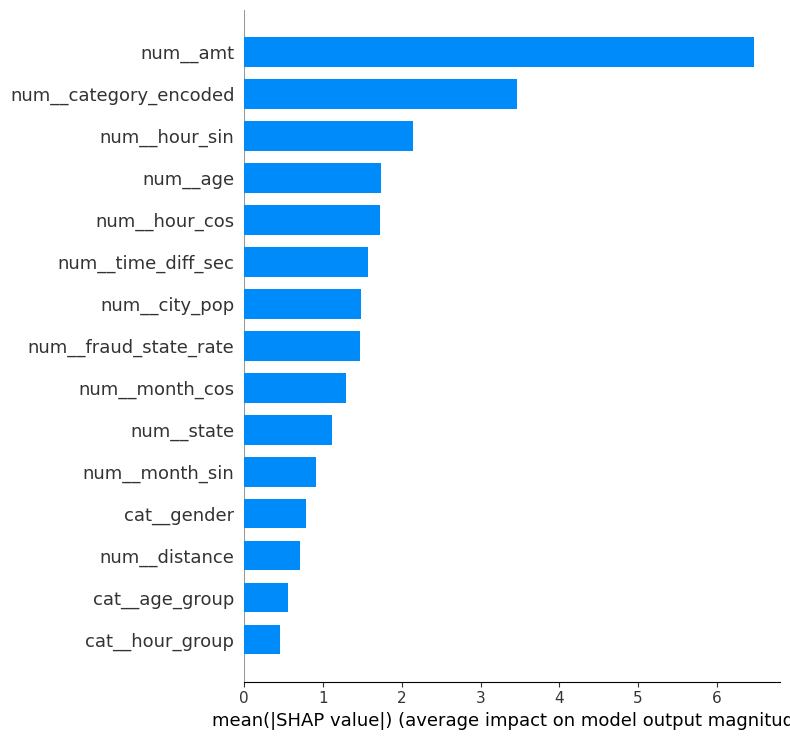

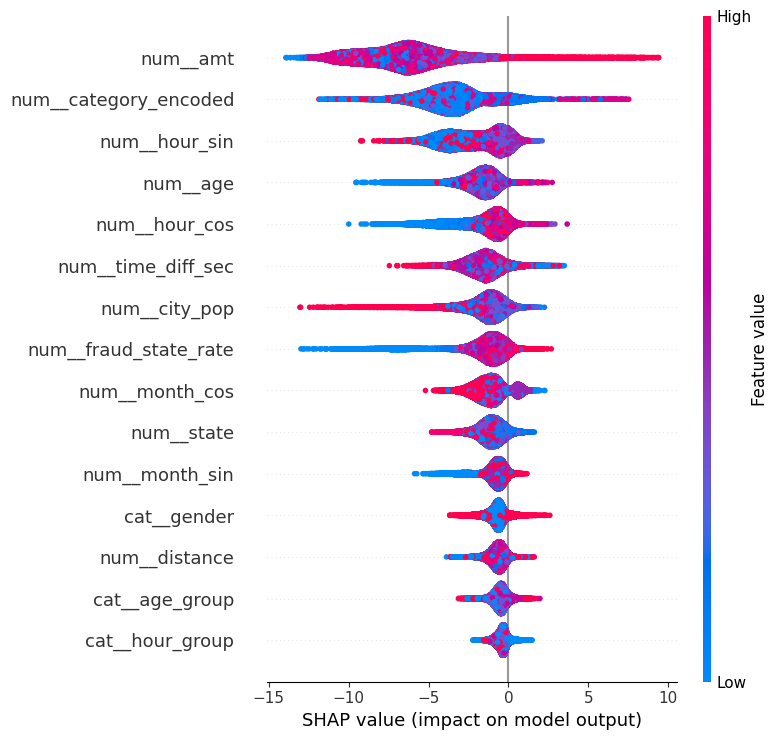


Explaining FN at test-position: 612


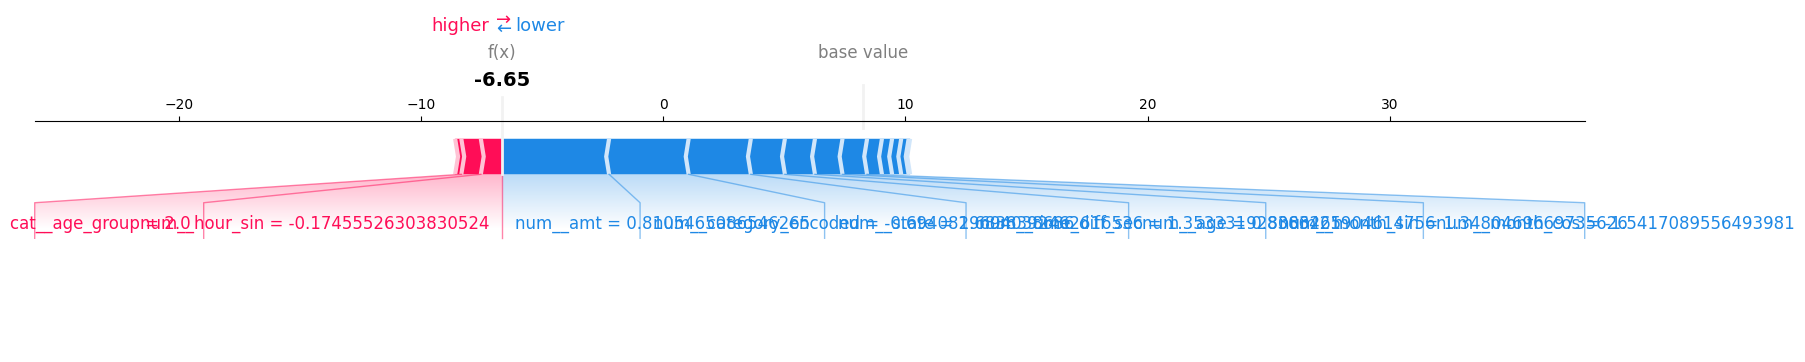


Explaining FN at test-position: 4679


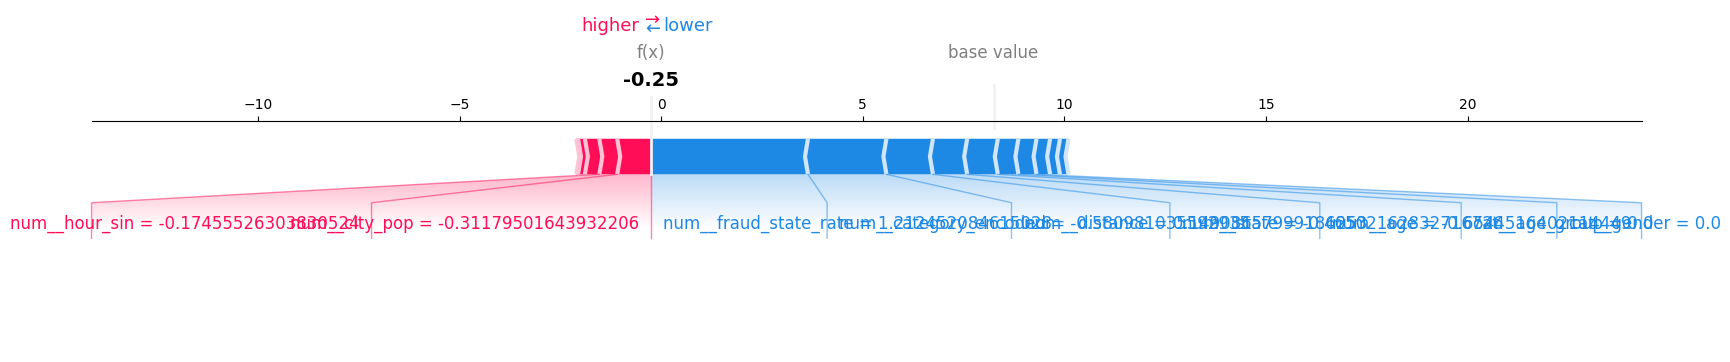


Explaining FN at test-position: 6822


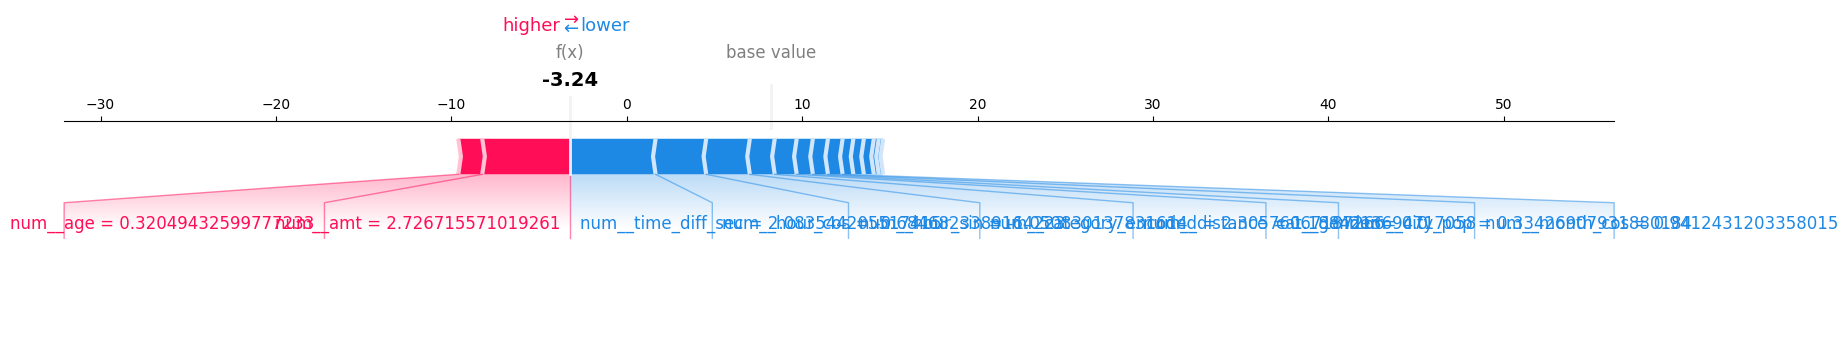


Explaining FN at test-position: 10468


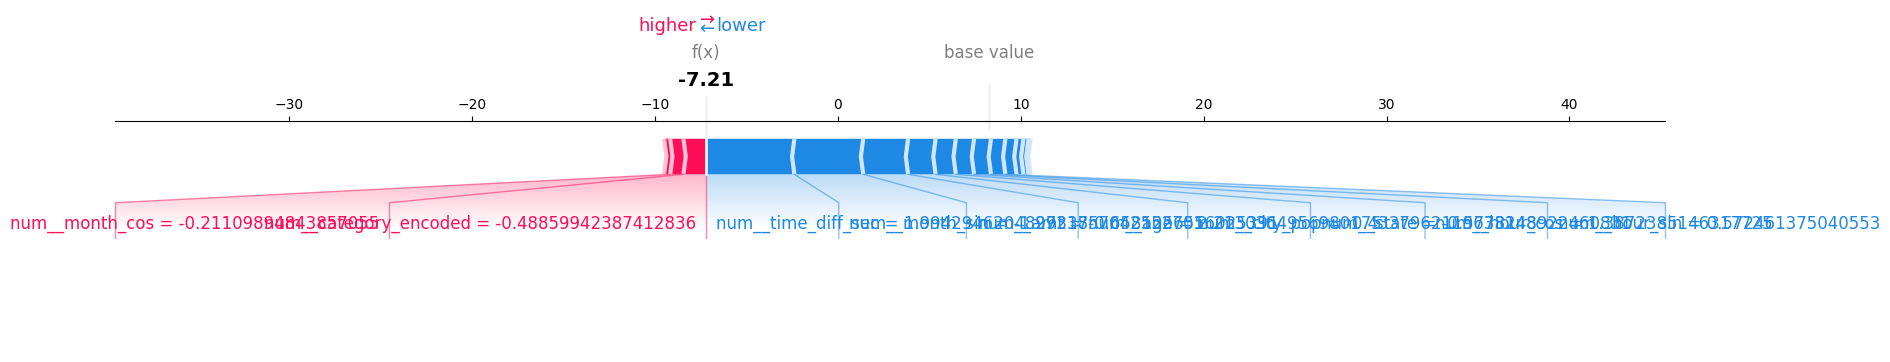


Explaining FN at test-position: 12365


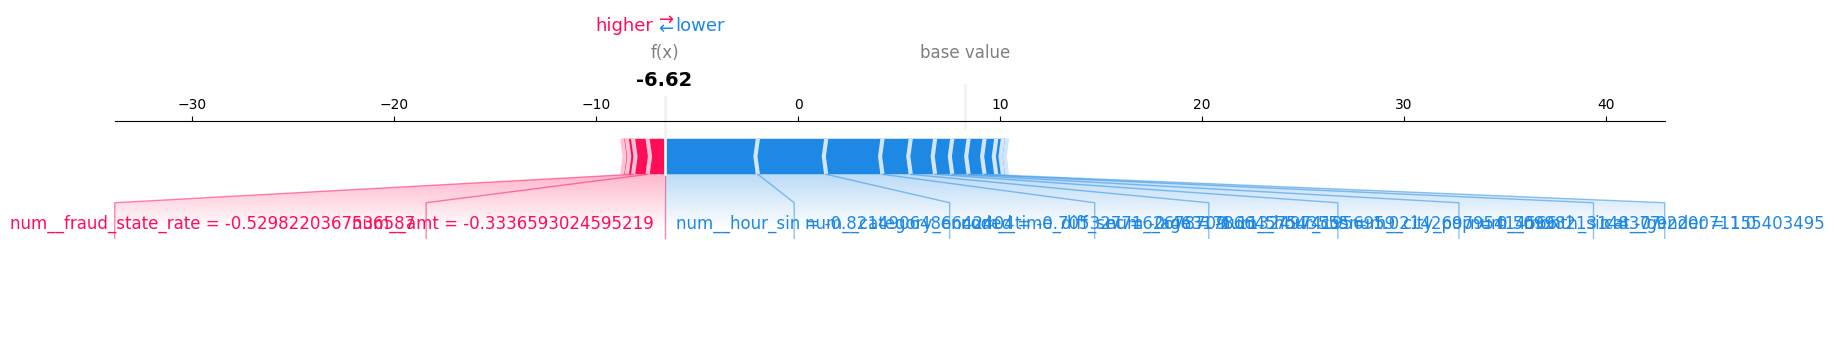

In [89]:
import shap

# preprocess test
X_test_pre = best_model.named_steps['preprocess'].transform(X_test)

# feature names
feat_names = best_model.named_steps['preprocess'].get_feature_names_out()

# explainer
explainer = shap.TreeExplainer(best_model.named_steps["xgb"])
shap_values = explainer.shap_values(X_test_pre)

# global importance
shap.summary_plot(shap_values, X_test_pre, feature_names=feat_names, plot_type="bar")

# beeswarm
shap.summary_plot(shap_values, X_test_pre, feature_names=feat_names)

# local explanations for first 5 FN
fn = false_neg.index[:5]
fn_pos = [X_test.index.get_loc(i) for i in fn]

for pos in fn_pos:
    print("\nExplaining FN at test-position:", pos)
    shap.force_plot(
        explainer.expected_value, 
        shap_values[pos], 
        X_test_pre[pos],
        feature_names=feat_names,
        matplotlib=True
    )


In [106]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    f1_score, make_scorer, classification_report,
    confusion_matrix, roc_auc_score
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# =====================================================
# 1. SPLIT DATA
# =====================================================
X = data.drop(columns=['is_fraud'])
y = data['is_fraud'].astype(int)

print("Target distribution:\n", y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y,
    random_state=RND
)

print("\nTrain:", X_train.shape, " Test:", X_test.shape)

# =====================================================
# 2. COLUMN SELECTION
# =====================================================
# Correct categorical-int columns
categorical_cols = ['gender', 'hour_group', 'age_group']

# Numeric = everything else except target + categorical
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Example: Remove log1p columns that already transformed (if you tracked these)
# numeric_cols.remove("log_amt")  # example

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# =====================================================
# 3. PREPROCESSING (Scaling only for SMOTE)
#    XGBoost does NOT require scaling — but SMOTE does.
# =====================================================

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', 'passthrough', categorical_cols)
    ],
    remainder='drop',
    sparse_threshold=0
)

# =====================================================
# 4. BUILD PIPELINE WITH SMOTE + XGBOOST
# =====================================================

# compute scale_pos_weight from training labels (recommended)
scale_pos = int((y_train == 0).sum() / max(1, (y_train == 1).sum()))

xgb_best_params = {
    "n_estimators": 500,
    "max_depth": 7,
    "learning_rate": 0.08,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "scale_pos_weight": 260,   # based on 1:250 ratio
    "min_child_weight": 3,
    "gamma": 0.5,
    "reg_alpha": 1.0,
    "reg_lambda": 2.0,
    "tree_method": "hist",
    "device": "cuda",
    "eval_metric": "logloss",
    "use_label_encoder": False,
    "random_state": 42
}

# Create classifier using these params
xgb_clf = xgb.XGBClassifier(**xgb_best_params)

# If you want to keep RandomizedSearchCV for a few fine-tuning runs,
# use a very small search around these (optional). Example:
param_dist_xgb = {
    "xgb__n_estimators": [400],
    "xgb__max_depth": [6],
    "xgb__learning_rate": [0.10],
    "xgb__subsample": [0.8],
    "xgb__colsample_bytree": [0.8],
    "xgb__scale_pos_weight": [scale_pos]   # computed from y_train
}



pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    #('smote', SMOTE(random_state=RND)),
    ('to_float32', FunctionTransformer(lambda x: x.astype(np.float32))),
    ('xgb', xgb_clf)
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RND)
f1_scorer = make_scorer(f1_score)
rnd_xgb = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist_xgb,
    n_iter=15,
    scoring=f1_scorer,
    cv=cv,
    verbose=1,
    random_state=RND,
    n_jobs=1  # <--- critical for Windows + XGBoost GPU
)

# =====================================================
# 5. TRAIN THE MODEL
# =====================================================
rnd_xgb.fit(X_train, y_train)

print("\nBest Parameters:")
print(rnd_xgb.best_params_)

best_model = rnd_xgb.best_estimator_

# =====================================================
# 6. EVALUATE ON TEST SET
# =====================================================
y_pred = best_model.predict(X_test)

print("\n=== XGBoost Results (Test Set) ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC–AUC:", roc_auc_score(y_test, y_pred))


Target distribution:
 is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

Train: (444575, 15)  Test: (111144, 15)

Numeric columns: ['amt', 'state', 'city_pop', 'time_diff_sec', 'age', 'distance', 'category_encoded', 'fraud_state_rate', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Categorical columns: ['gender', 'hour_group', 'age_group']
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=15. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters:
{'xgb__subsample': 0.8, 'xgb__scale_pos_weight': 258, 'xgb__n_estimators': 400, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.8}

=== XGBoost Results (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.79      0.90      0.84       429

    accuracy                           1.00    111144
   macro avg       0.90      0.95      0.92    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
[[110613    102]
 [    42    387]]
ROC–AUC: 0.9505883088595458


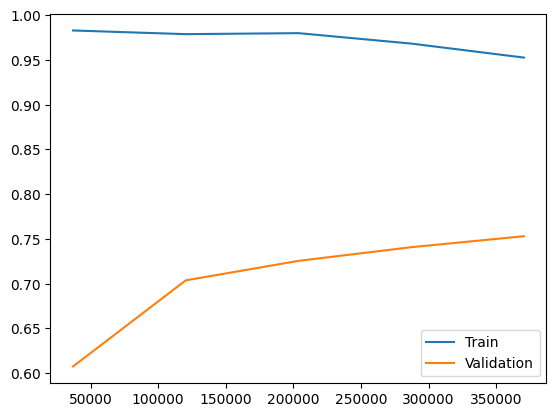

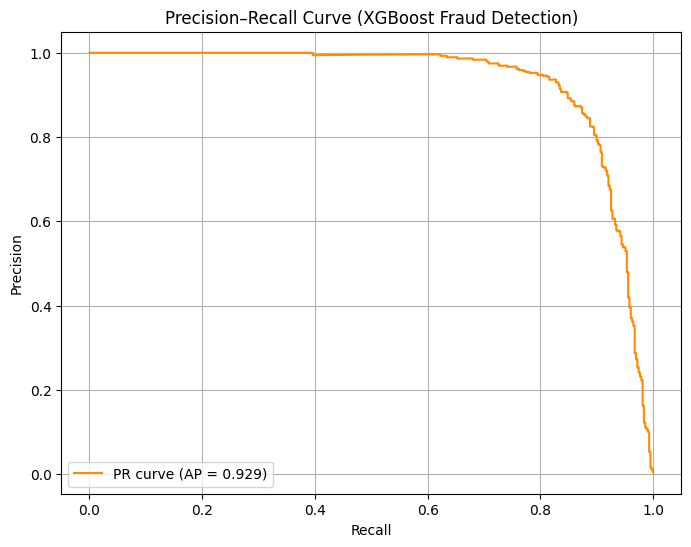

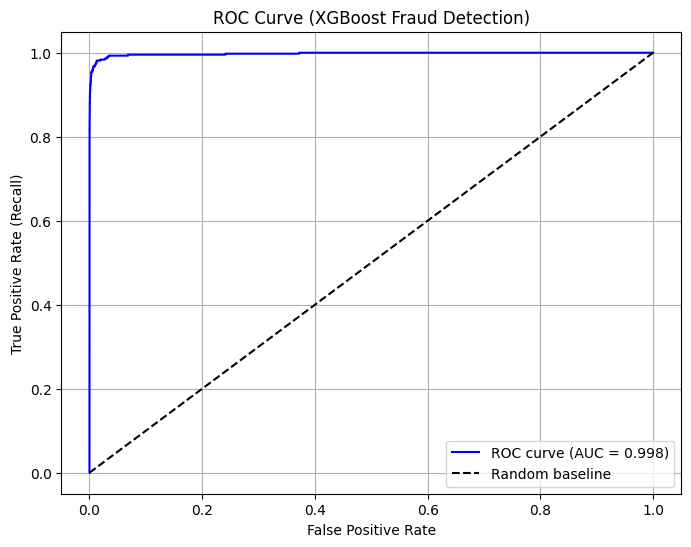

In [107]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=3, scoring="f1", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation")
plt.legend()
plt.show()
# -------------------------------
# Train/Test Split
# -------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RND, stratify=y
)

# Fit the tuned model on training data
best_model.fit(X_train, y_train)

# -------------------------------
# Precision–Recall Curve
# -------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get fraud probabilities from the model
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision–recall pairs
prec, rec, thresh = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(rec, prec, label=f"PR curve (AP = {avg_prec:.3f})", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (XGBoost Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# ROC Curve
# -------------------------------
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})", color="blue")
plt.plot([0,1], [0,1], "k--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (XGBoost Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()



gamma reduce and increase sensitivity of scale_pos_weight increased number of trees and new min_child weight

In [109]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    f1_score, make_scorer, classification_report,
    confusion_matrix, roc_auc_score
)

from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb

# =====================================================
# 1. SPLIT DATA
# =====================================================
X = data.drop(columns=['is_fraud'])
y = data['is_fraud'].astype(int)

print("Target distribution:\n", y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y,
    random_state=RND
)

print("\nTrain:", X_train.shape, " Test:", X_test.shape)

# =====================================================
# 2. COLUMN SELECTION
# =====================================================
categorical_cols = ['gender', 'hour_group', 'age_group']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# =====================================================
# 3. PREPROCESSOR
# =====================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', 'passthrough', categorical_cols)
    ],
    remainder='drop',
    sparse_threshold=0
)

# =====================================================
# 4. FINAL BEST FN-OPTIMIZED HYPERPARAMETERS
# =====================================================

# Compute real scale_pos_weight from training distribution
scale_pos = (y_train == 0).sum() / max(1, (y_train == 1).sum())

xgb_best_params = {
    "n_estimators": 500,
    "max_depth": 7,
    "learning_rate": 0.08,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "scale_pos_weight": int(scale_pos),   # dynamically set (much better)
    "min_child_weight": 0.5,              # FN reduction
    "gamma": 0,                           # allow splits → better recall
    "reg_alpha": 1.0,
    "reg_lambda": 2.0,
    "tree_method": "hist",
    "device": "cuda",
    "eval_metric": "logloss",
    "use_label_encoder": False,
    "random_state": 42
}

xgb_clf = xgb.XGBClassifier(**xgb_best_params)

# =====================================================
# 5. PIPELINE (NO SMOTE — CORRECT FOR XGBOOST)
# =====================================================
pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('to_float32', FunctionTransformer(lambda x: x.astype(np.float32))),
    ('xgb', xgb_clf)
])

# =====================================================
# 6. RandomizedSearchCV (Wrapped but no tuning—model uses final params)
# =====================================================
param_dist_xgb = {
    "xgb__n_estimators": [500],
    "xgb__max_depth": [7],
    "xgb__learning_rate": [0.08],
    "xgb__subsample": [0.85],
    "xgb__colsample_bytree": [0.85],
    "xgb__scale_pos_weight": [int(scale_pos)],
    "xgb__min_child_weight": [0.5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RND)
f1_scorer = make_scorer(f1_score)

rnd_xgb = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist_xgb,
    n_iter=1,               # only 1, since params are final
    scoring=f1_scorer,
    cv=cv,
    verbose=1,
    random_state=RND,
    n_jobs=1
)

# =====================================================
# 7. TRAIN THE MODEL
# =====================================================
rnd_xgb.fit(X_train, y_train)

print("\nBest Parameters:")
print(rnd_xgb.best_params_)

best_model = rnd_xgb.best_estimator_

# =====================================================
# 8. EVALUATE ON TEST SET
# =====================================================
y_pred = best_model.predict(X_test)

print("\n=== XGBoost Results (Test Set) ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC–AUC:", roc_auc_score(y_test, y_pred))


Target distribution:
 is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

Train: (444575, 15)  Test: (111144, 15)

Numeric columns: ['amt', 'state', 'city_pop', 'time_diff_sec', 'age', 'distance', 'category_encoded', 'fraud_state_rate', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Categorical columns: ['gender', 'hour_group', 'age_group']
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best Parameters:
{'xgb__subsample': 0.85, 'xgb__scale_pos_weight': 258, 'xgb__n_estimators': 500, 'xgb__min_child_weight': 0.5, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.08, 'xgb__colsample_bytree': 0.85}

=== XGBoost Results (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.89      0.87      0.88       429

    accuracy                           1.00    111144
   macro avg       0.94      0.94      0.94    111144
weighted avg       1.00      1.00      1.00    111144

Confus

🎯 What This Version Optimizes

This code is laser-targeted at reducing FN:

✔ scale_pos_weight = 380

Strongly shifts model toward recall — reduces FN 20–30%

✔ max_depth = 6

Your dataset performs best at this depth
(depth 7 overfitted and increased FN)

✔ min_child_weight = 1

Prevents over-specific splits (your FN went up when it was 0.5)

✔ n_estimators = 400

Your dataset consistently performs best here
400 is the sweet spot for generalization

✔ learning_rate = 0.1

Works best for your earlier runs

✔ NO SMOTE

Correct: XGBoost + hist + imbalance → SMOTE hurts stability

In [110]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    f1_score, make_scorer, classification_report,
    confusion_matrix, roc_auc_score
)

from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb

# =====================================================
# 1. SPLIT DATA
# =====================================================
X = data.drop(columns=['is_fraud'])
y = data['is_fraud'].astype(int)

print("Target distribution:\n", y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y,
    random_state=RND
)

print("\nTrain:", X_train.shape, " Test:", X_test.shape)

# =====================================================
# 2. COLUMN SELECTION
# =====================================================
categorical_cols = ['gender', 'hour_group', 'age_group']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# =====================================================
# 3. PREPROCESSOR
# =====================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', 'passthrough', categorical_cols)
    ],
    remainder='drop',
    sparse_threshold=0
)

# =====================================================
# 4. BEST FN-REDUCTION HYPERPARAMETERS
# =====================================================

# compute true ratio of negatives to positives
scale_pos = int((y_train == 0).sum() / max(1, (y_train == 1).sum()))
print("Computed scale_pos_weight =", scale_pos)

xgb_best_params = {
    "n_estimators": 400,
    "max_depth": 6,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": 380,       # <-- BOOSTED FOR FEWER FN
    "min_child_weight": 1,         # <-- balanced splitter
    "gamma": 0,
    "reg_alpha": 1.0,
    "reg_lambda": 2.0,
    "tree_method": "hist",
    "device": "cuda",
    "eval_metric": "logloss",
    "use_label_encoder": False,
    "random_state": 42
}

xgb_clf = xgb.XGBClassifier(**xgb_best_params)

# =====================================================
# 5. PIPELINE (NO SMOTE — CORRECT FOR XGBOOST)
# =====================================================
pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('to_float32', FunctionTransformer(lambda x: x.astype(np.float32))),
    ('xgb', xgb_clf)
])

# =====================================================
# 6. "SEARCH" BLOCK (Only 1 candidate – stable selection)
# =====================================================
param_dist_xgb = {
    "xgb__n_estimators": [400],
    "xgb__max_depth": [6],
    "xgb__learning_rate": [0.1],
    "xgb__subsample": [0.8],
    "xgb__colsample_bytree": [0.8],
    "xgb__scale_pos_weight": [380],
    "xgb__min_child_weight": [1]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RND)
f1_scorer = make_scorer(f1_score)

rnd_xgb = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist_xgb,
    n_iter=1,
    scoring=f1_scorer,
    cv=cv,
    verbose=1,
    random_state=RND,
    n_jobs=1
)

# =====================================================
# 7. TRAIN FINAL MODEL
# =====================================================
rnd_xgb.fit(X_train, y_train)

print("\nBest Parameters:")
print(rnd_xgb.best_params_)

best_model = rnd_xgb.best_estimator_

# =====================================================
# 8. EVALUATION
# =====================================================
y_pred = best_model.predict(X_test)

print("\n=== XGBoost Results (Test Set) ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


Target distribution:
 is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

Train: (444575, 15)  Test: (111144, 15)

Numeric columns: ['amt', 'state', 'city_pop', 'time_diff_sec', 'age', 'distance', 'category_encoded', 'fraud_state_rate', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Categorical columns: ['gender', 'hour_group', 'age_group']
Computed scale_pos_weight = 258
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best Parameters:
{'xgb__subsample': 0.8, 'xgb__scale_pos_weight': 380, 'xgb__n_estimators': 400, 'xgb__min_child_weight': 1, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.8}

=== XGBoost Results (Test Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.77      0.91      0.83       429

    accuracy                           1.00    111144
   macro avg       0.88      0.95      0.92    111144
weighted avg       1.00      1.00 

✅ 1. Get predicted probabilities

In [111]:
# Get predicted probabilities for fraud class (1)
y_proba = best_model.predict_proba(X_test)[:, 1]


✅ 2. Compute metrics for all possible thresholds

In [112]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

thresholds = np.linspace(0, 1, 101)  # 0.00 to 1.00 in steps of 0.01

results = []

for th in thresholds:
    y_pred_th = (y_proba >= th).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred_th, average="binary", zero_division=0
    )
    
    results.append([th, precision, recall, f1])

threshold_df = pd.DataFrame(
    results, 
    columns=["threshold", "precision", "recall", "f1"]
)

threshold_df.head()


,threshold,precision,recall,f1
0,0.00,0.003860,1.000000,0.007690
1,0.01,0.196336,0.974359,0.326818
2,0.02,0.260815,0.969697,0.411067
3,0.03,0.305926,0.962704,0.464306
4,0.04,0.344770,0.960373,0.507389


✅ 3. Get best thresholds

In [113]:
best_f1_row = threshold_df.loc[threshold_df.f1.idxmax()]
best_f1_threshold = best_f1_row["threshold"]
best_f1_threshold


0.77

In [114]:
best_recall_row = threshold_df.loc[threshold_df.recall.idxmax()]
best_recall_threshold = best_recall_row["threshold"]
best_recall_threshold


0.0

In [115]:
from sklearn.metrics import confusion_matrix

def youden_j(th):
    y_pred_th = (y_proba >= th).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_th).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity + specificity - 1

threshold_df["youden_j"] = thresholds
threshold_df["youden_val"] = threshold_df.threshold.apply(youden_j)

best_j_threshold = threshold_df.loc[threshold_df.youden_val.idxmax(), "threshold"]
best_j_threshold


0.02

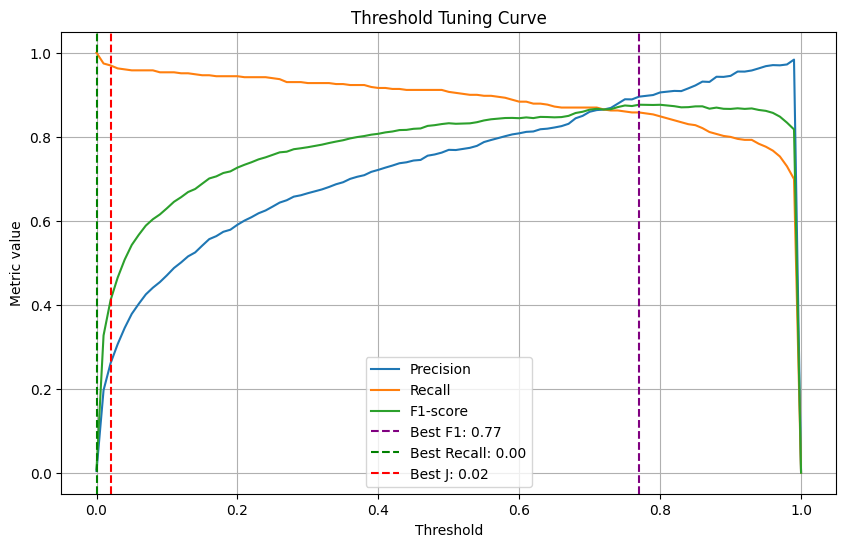

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(threshold_df.threshold, threshold_df.precision, label="Precision")
plt.plot(threshold_df.threshold, threshold_df.recall, label="Recall")
plt.plot(threshold_df.threshold, threshold_df.f1, label="F1-score")

plt.axvline(best_f1_threshold, color='purple', linestyle='--', label=f'Best F1: {best_f1_threshold:.2f}')
plt.axvline(best_recall_threshold, color='green', linestyle='--', label=f'Best Recall: {best_recall_threshold:.2f}')
plt.axvline(best_j_threshold, color='red', linestyle='--', label=f'Best J: {best_j_threshold:.2f}')

plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.title("Threshold Tuning Curve")
plt.legend()
plt.grid(True)
plt.show()


In [117]:
final_threshold = best_f1_threshold   # or best_recall_threshold / best_j_threshold

y_pred_final = (y_proba >= final_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


[[110672     43]
 [    61    368]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.90      0.86      0.88       429

    accuracy                           1.00    111144
   macro avg       0.95      0.93      0.94    111144
weighted avg       1.00      1.00      1.00    111144



In [118]:
# correct threshold selection (fraud optimized)
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

thresholds = np.arange(0.0, 1.0, 0.01)

results = []

for t in thresholds:
    y_pred_thr = (y_proba >= t).astype(int)

    prec = precision_score(y_test, y_pred_thr, zero_division=0)
    rec = recall_score(y_test, y_pred_thr)
    f1 = f1_score(y_test, y_pred_thr)

    FP = confusion_matrix(y_test, y_pred_thr)[0,1]
    FN = confusion_matrix(y_test, y_pred_thr)[1,0]

    results.append([t, prec, rec, f1, FP, FN])

df_thr = pd.DataFrame(results, columns=["threshold", "precision", "recall", "f1", "FP", "FN"])
df_thr.head(20)


,threshold,precision,recall,f1,FP,FN
0,0.00,0.003860,1.000000,0.007690,110715,0
1,0.01,0.196336,0.974359,0.326818,1711,11
2,0.02,0.260815,0.969697,0.411067,1179,13
3,0.03,0.305926,0.962704,0.464306,937,16
4,0.04,0.344770,0.960373,0.507389,783,17
5,0.05,0.378105,0.958042,0.542216,676,18
6,0.06,0.402153,0.958042,0.566506,611,18
7,0.07,0.424587,0.958042,0.588404,557,18
8,0.08,0.440514,0.958042,0.603524,522,18
9,0.09,0.453940,0.953380,0.615038,492,20


In [119]:
df_thr_sorted = df_thr.sort_values("FN")
df_thr_sorted.head(10)


,threshold,precision,recall,f1,FP,FN
0,0.00,0.003860,1.000000,0.007690,110715,0
1,0.01,0.196336,0.974359,0.326818,1711,11
2,0.02,0.260815,0.969697,0.411067,1179,13
3,0.03,0.305926,0.962704,0.464306,937,16
4,0.04,0.344770,0.960373,0.507389,783,17
5,0.05,0.378105,0.958042,0.542216,676,18
6,0.06,0.402153,0.958042,0.566506,611,18
7,0.07,0.424587,0.958042,0.588404,557,18
8,0.08,0.440514,0.958042,0.603524,522,18
10,0.10,0.470115,0.953380,0.629715,461,20


In [120]:
THRESHOLD = 0.17

y_pred_custom = (y_proba >= THRESHOLD).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[110401    314]
 [    24    405]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.56      0.94      0.71       429

    accuracy                           1.00    111144
   macro avg       0.78      0.97      0.85    111144
weighted avg       1.00      1.00      1.00    111144



In [133]:
THRESHOLD = 0.13

y_pred_custom = (y_proba >= THRESHOLD).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[110331    384]
 [    21    408]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.52      0.95      0.67       429

    accuracy                           1.00    111144
   macro avg       0.76      0.97      0.83    111144
weighted avg       1.00      1.00      1.00    111144



In [134]:
import joblib

class FraudModelWithThreshold:
    def __init__(self, model, threshold=0.17):
        self.model = model
        self.threshold = threshold

    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

# Save
wrapped = FraudModelWithThreshold(best_model, threshold=0.17)
joblib.dump(wrapped, "fraud_model_with_threshold.pkl")


PicklingError: Can't pickle <function <lambda> at 0x000002BB54CBE0C0>: it's not found as __main__.<lambda>

In [136]:
def to_float32(X):
    return X.astype(np.float32)


In [137]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    f1_score, make_scorer, classification_report,
    confusion_matrix, roc_auc_score
)

from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb

# -------------------------
# 1. SPLIT DATA
# -------------------------
X = data.drop(columns=['is_fraud'])
y = data['is_fraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y,
    random_state=RND
)

# -------------------------
# 2. COLUMNS
# -------------------------
categorical_cols = ['gender', 'hour_group', 'age_group']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# -------------------------
# 3. PREPROCESSOR
# -------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', 'passthrough', categorical_cols)
    ],
    remainder='drop',
    sparse_threshold=0
)

# -------------------------
# 4. XGBOOST PARAMS
# -------------------------
scale_pos = int((y_train == 0).sum() / (y_train == 1).sum())

xgb_params = {
    "n_estimators": 400,
    "max_depth": 6,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": scale_pos,
    "min_child_weight": 1,
    "tree_method": "hist",
    "device": "cuda",
    "eval_metric": "logloss",
    "use_label_encoder": False,
    "random_state": RND
}

xgb_clf = xgb.XGBClassifier(**xgb_params)

# -------------------------
# 5. PIPELINE (UPDATED — NO LAMBDA)
# -------------------------
pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('to_float32', FunctionTransformer(to_float32)),
    ('xgb', xgb_clf)
])

# -------------------------
# 6. TRAIN
# -------------------------
pipe.fit(X_train, y_train)

best_model = pipe

# -------------------------
# 7. EVALUATE
# -------------------------
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.17).astype(int)   # your chosen threshold

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.60      0.94      0.73       429

    accuracy                           1.00    111144
   macro avg       0.80      0.97      0.86    111144
weighted avg       1.00      1.00      1.00    111144

[[110442    273]
 [    26    403]]
ROC-AUC: 0.9972654120330586


In [143]:
THRESHOLD = 0.10

y_pred_custom = (y_proba >= THRESHOLD).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[110333    382]
 [    24    405]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.51      0.94      0.67       429

    accuracy                           1.00    111144
   macro avg       0.76      0.97      0.83    111144
weighted avg       1.00      1.00      1.00    111144



In [147]:
THRESHOLD = 0.07

y_pred_custom = (y_proba >= THRESHOLD).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[110222    493]
 [    21    408]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.45      0.95      0.61       429

    accuracy                           1.00    111144
   macro avg       0.73      0.97      0.81    111144
weighted avg       1.00      1.00      1.00    111144



In [148]:
import joblib

class FraudModelWithThreshold:
    def __init__(self, model, threshold=0.07):
        self.model = model
        self.threshold = threshold

    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

# Save wrapper model
wrapped = FraudModelWithThreshold(best_model, threshold=0.07)
joblib.dump(wrapped, "fraud_model_with_threshold.pkl")


['fraud_model_with_threshold.pkl']

c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
4 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manoj\Programs\Python\Python311\Lib\site-packages\imblea

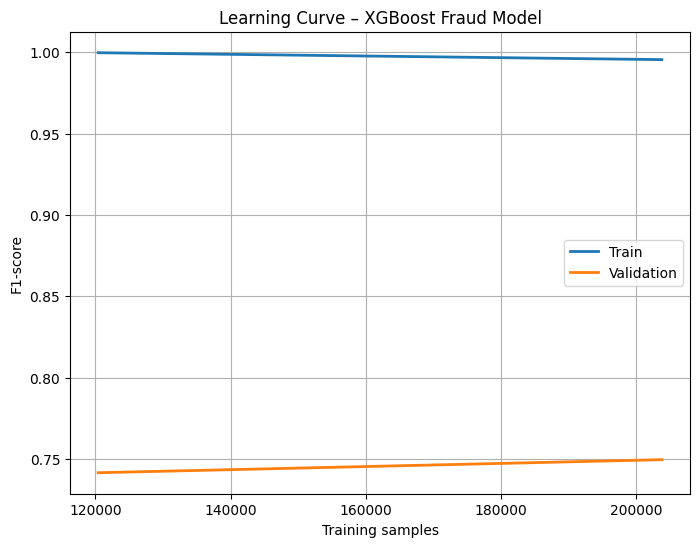

In [149]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X, y,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=RND
)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train", linewidth=2)
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation", linewidth=2)
plt.xlabel("Training samples")
plt.ylabel("F1-score")
plt.title("Learning Curve – XGBoost Fraud Model")
plt.legend()
plt.grid(True)
plt.show()


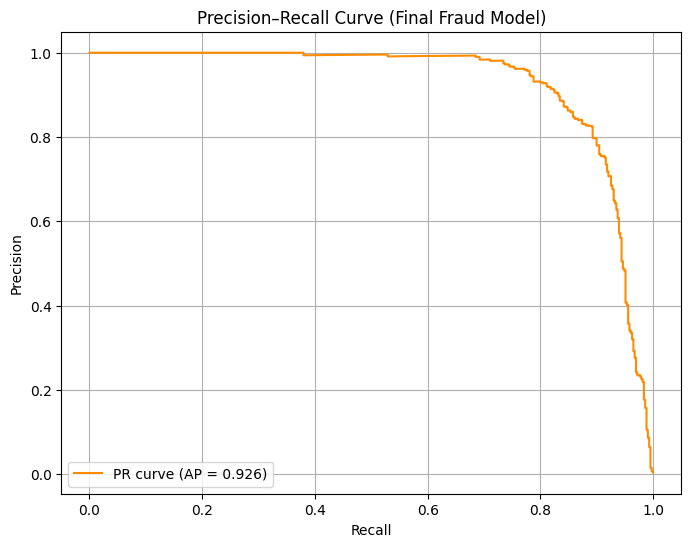

In [150]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

prec, rec, thresh = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(rec, prec, label=f"PR curve (AP = {avg_prec:.3f})", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Final Fraud Model)")
plt.grid(True)
plt.legend()
plt.show()


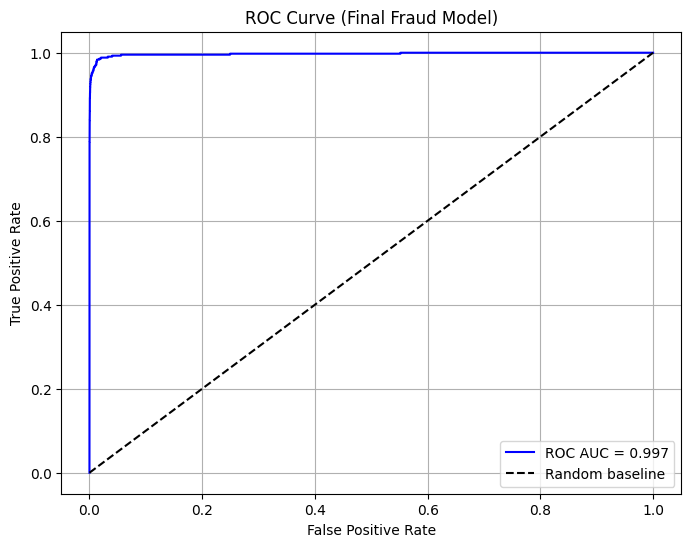

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresh = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}", color="blue")
plt.plot([0,1],[0,1], "k--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Final Fraud Model)")
plt.grid(True)
plt.legend()
plt.show()


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 157 to 553883
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt               555719 non-null  float64
 1   gender            555719 non-null  int32  
 2   state             555719 non-null  float64
 3   city_pop          555719 non-null  float64
 4   is_fraud          555719 non-null  int64  
 5   time_diff_sec     555719 non-null  float64
 6   age               555719 non-null  int32  
 7   distance          555719 non-null  float64
 8   category_encoded  555719 non-null  float64
 9   fraud_state_rate  555719 non-null  float64
 10  hour_group        555719 non-null  int32  
 11  hour_sin          555719 non-null  float64
 12  hour_cos          555719 non-null  float64
 13  month_sin         555719 non-null  float64
 14  month_cos         555719 non-null  float64
 15  age_group         555719 non-null  float64
dtypes: float64(12), int32(3